In [101]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [173]:
import sys
import importlib

# Salve o caminho original
original_path = sys.path.copy()

# Adicione o novo caminho


sys.path.insert(0, '../config/')

# Importe o módulo
import plot_functions

importlib.reload(plot_functions)

# Restaure o caminho original
sys.path = original_path


# Identificação dos tipos de colunas

In [118]:
open_path = os.path.join('..', 'dataset', 'ativos_filtrados_mapeados.parquet')

df = pd.read_parquet(open_path,engine='pyarrow')

In [119]:
df.head(4)

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,data_situacao_cadastral,data_de_inicio_atividade,cnae_fiscal_principal,cnae_fiscal_secundaria,bairro,cep,uf,municipio,razao_social,capital_social,porte_empresa
0,7756651,33,32,Filial,2022-01-12,2022-01-12,Provedores de redes,"6110803,6319400",CENTRO,79002190.0,MS,9051,BRASIL TECPAR SERVICOS DE TELECOMUNICACOES S.A,655801154,Demais
1,7756651,42,23,Filial,2022-02-16,2022-02-16,Provedores de redes,"4751201,6204000",SETOR COMERCIAL,78550258.0,MT,8985,BRASIL TECPAR SERVICOS DE TELECOMUNICACOES S.A,655801154,Demais
2,4679549,1,5,Matriz,2004-04-09,2001-09-24,Escritório e apoio administrativo,None,TANGUA,83508270.0,PR,7407,MERANO GASTRONOMIA BORGUEZAM LTDA,40000,Micro empresa
3,4718504,1,0,Matriz,2005-11-03,2001-10-09,Locação de automóveis sem condutor,"7719599,0230600,7490104",PARQUE CAMPOLIM,18048100.0,SP,7145,RBM RAMIRES LOCADORA LTDA,50000,Demais


In [120]:
# Tipos das variáveis e quantidade de pontos não-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682916 entries, 0 to 1683342
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   cnpj_basico                  1682916 non-null  int64  
 1   cnpj_ordem                   1682916 non-null  int64  
 2   cnpj_dv                      1682916 non-null  int64  
 3   identificador_matriz_filial  1682916 non-null  object 
 4   data_situacao_cadastral      1682916 non-null  object 
 5   data_de_inicio_atividade     1682916 non-null  object 
 6   cnae_fiscal_principal        1682916 non-null  object 
 7   cnae_fiscal_secundaria       1076797 non-null  object 
 8   bairro                       1682507 non-null  object 
 9   cep                          1681864 non-null  float64
 10  uf                           1682916 non-null  object 
 11  municipio                    1682916 non-null  int64  
 12  razao_social                 1682916 non-n

Colunas string que podem ser chave-primária ou descrição.

In [121]:
# Colunas do tipo object
object_columns = df.columns

# Número de categorias únicas em cada coluna
unique_counts = {col: df[col].nunique() for col in object_columns}

# Resultados em tabela
result_df = pd.DataFrame(list(unique_counts.items()), columns=['Coluna', 'Número de Itens Únicos'])
print(result_df)

                         Coluna  Número de Itens Únicos
0                   cnpj_basico                 1645189
1                    cnpj_ordem                    1223
2                       cnpj_dv                     100
3   identificador_matriz_filial                       2
4       data_situacao_cadastral                    8930
5      data_de_inicio_atividade                   15836
6         cnae_fiscal_principal                      20
7        cnae_fiscal_secundaria                  388682
8                        bairro                   82466
9                           cep                  453423
10                           uf                      28
11                    municipio                    5567
12                 razao_social                 1632789
13               capital_social                   15879
14                porte_empresa                       3


	cat
porte_empresa  
uf  
cnae_fiscal_principal  
identificador_matriz_filial  

    num
capital_social  

	datetime
data_de_inicio_atividade  
data_situacao_cadastral  

	não agregável
razao_social  
correio_eletronico  
telefone2  
ddd2  
telefone1  
ddd1  
municipio  
cep  
bairro  
complemento  
numero  
logradouro  
tipo_de_logradouro  
cnae_fiscal_secundaria  
nome_da_cidade_no_exterior  
motivo_situacao_cadastral  
situacao_cadastral  
nome_fantasia  
cnpj_dv  
cnpj_ordem  
cnpj_basico  

Separação de colunas não agregáveis:

In [122]:
Non_Aggregatable = ['razao_social',
                    'correio_eletronico',
                    'telefone2',
                    'ddd2',
                    'telefone1',
                    'ddd1',
                    'municipio',
                    'cep',
                    'bairro',
                    'complemento',
                    'numero',
                    'logradouro',
                    'tipo_de_logradouro',
                    'cnae_fiscal_secundaria',
                    'nome_da_cidade_no_exterior',
                    'motivo_situacao_cadastral',
                    'situacao_cadastral',
                    'nome_fantasia',
                    'cnpj_dv',
                    'cnpj_ordem',
                    'cnpj_basico']

In [123]:
Categorical = ['uf',
               'cnae_fiscal_principal',
               'porte_empresa',
               'identificador_matriz_filial']

In [124]:
Numerical = ['capital_social']

In [125]:
DateTime = ['data_situacao_cadastral',
            'data_de_inicio_atividade']

In [126]:
df_a = df[Categorical+Numerical+DateTime]

## Ajuste dos tipos de variáveis

Conversão para DateTime.

In [127]:
def convert_datetime_columns(df):
    newdf = df.copy()
    for col in newdf.select_dtypes(include=['object']).columns:
        try:
            newdf[col] = pd.to_datetime(newdf[col], errors='raise', dayfirst=True)
        except ValueError:
            try:
                newdf[col] = pd.to_datetime(newdf[col], errors='raise')
            except ValueError:
                pass
    
    return newdf

In [128]:
df_time = convert_datetime_columns(df_a)

In [129]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682916 entries, 0 to 1683342
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   uf                           1682916 non-null  object        
 1   cnae_fiscal_principal        1682916 non-null  object        
 2   porte_empresa                1682272 non-null  object        
 3   identificador_matriz_filial  1682916 non-null  object        
 4   capital_social               1682916 non-null  int64         
 5   data_situacao_cadastral      1682916 non-null  datetime64[ns]
 6   data_de_inicio_atividade     1682916 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 102.7+ MB


Conversão de numéricos para categóricos:

In [130]:
df_t = df_time.copy()
for col in Categorical:
    df_t[col] = df_time[col].astype('object')

In [131]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682916 entries, 0 to 1683342
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   uf                           1682916 non-null  object        
 1   cnae_fiscal_principal        1682916 non-null  object        
 2   porte_empresa                1682272 non-null  object        
 3   identificador_matriz_filial  1682916 non-null  object        
 4   capital_social               1682916 non-null  int64         
 5   data_situacao_cadastral      1682916 non-null  datetime64[ns]
 6   data_de_inicio_atividade     1682916 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 102.7+ MB


In [132]:
df_n = df_t[Numerical]
df_c = df_t[Categorical]

# Apresentação dos Dados

Variáveis numéricas

Tamanho do dataset:

In [187]:
n_l = df_t.shape[0]
n_c = df_t.shape[1]

print(f'''Itens relevantes:
{' '*(10-len(str(n_c)))}{n_c} variáveis.
{' '*(10-len(str(n_l)))}{n_l} exemplares.''')

Itens relevantes:
         7 variáveis.
   1682916 exemplares.


Tipos das variáveis:

In [188]:
print('       Tipos das variáveis presentes no dataframe:')
for i in set(df_t.dtypes):
    print(f'{i}:')
    for col in df_t.columns:
        if i == df_t[col].dtypes:
            print(f'  {col}')

       Tipos das variáveis presentes no dataframe:
int64:
  capital_social
datetime64[ns]:
  data_situacao_cadastral
  data_de_inicio_atividade
object:
  uf
  cnae_fiscal_principal
  porte_empresa
  identificador_matriz_filial


Contagem de valores ausentes;

In [135]:
nan_counts = df.isna().sum()
print("Contagem de NaN por coluna:")
print(nan_counts)

Contagem de NaN por coluna:
cnpj_basico                         0
cnpj_ordem                          0
cnpj_dv                             0
identificador_matriz_filial         0
data_situacao_cadastral             0
data_de_inicio_atividade            0
cnae_fiscal_principal               0
cnae_fiscal_secundaria         606119
bairro                            409
cep                              1052
uf                                  0
municipio                           0
razao_social                        0
capital_social                      0
porte_empresa                     644
dtype: int64


In [ ]:
missing = df_t.isna().any(axis=1).sum()
print(f'{missing} instâncias têm algum valor ausente.')
print(f'{missing*100/len(df):.2f}% do dataset está incompleto.')

644 instâncias têm algum valor ausent.
0.04% do dataset está incompleto.


Medidas das variáveis numéricas.

In [137]:
resumo = df_n.describe().T
resumo = resumo.drop(columns=['count'])
resumo = resumo.rename(columns={
    'mean': 'Média',
    'std': 'Desvio-padrão',
    'min': 'Mínimo',
    '25%': '1º Quartil',
    '50%': 'Mediana',
    '75%': '3º Quartil',
    'max': 'Máximo'
})

resumo['Amplitude'] = resumo['Máximo'] - resumo['Mínimo']
resumo['Coeficiente de Variação'] = resumo['Desvio-padrão'] / resumo['Média']

moda = df_n.apply(lambda x: x.mode().values[0])

# Calcular a variância
variance = df_n.var()

# Incluir essas medidas no resumo
resumo['Moda'] = moda
resumo['Variância'] = variance


Medidas de posição e dispersão

In [138]:
resumo

,Média,Desvio-padrão,Mínimo,1º Quartil,Mediana,3º Quartil,Máximo,Amplitude,Coeficiente de Variação,Moda,Variância
capital_social,2.197629e+07,6.201045e+08,0.0,1000.0,5000.0,20000.0,2.054320e+11,2.054320e+11,28.216973,1000,3.845295e+17


Boxplots:

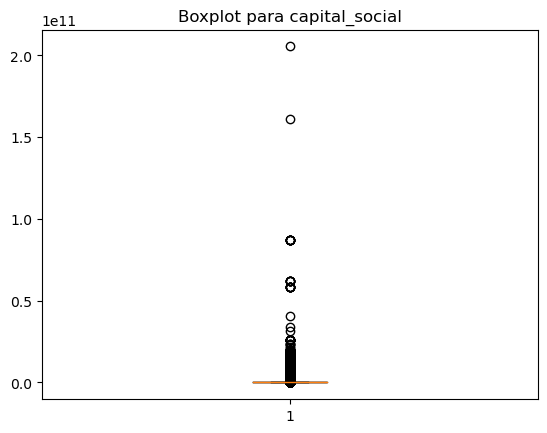

In [139]:
for col in df_n.columns:
    plt.boxplot(df_n[col])
    plt.title(f'Boxplot para {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Percentis:

In [140]:
percent_array = np.arange(0,101)    # Isto cria um array com 101 números, de 0 a 100.

percentil_df = pd.DataFrame()
percentil_df['Percentil'] = percent_array    # Os percentuais correspondem a uma coluna do dataframe
percentil_df['Percentil'] = percentil_df['Percentil'].apply(lambda x: str(f'{x}%'))    # Isso deixa a coluna com formato percentual

for col in df_n:
    percentil_df[col] = np.percentile(df_n[col], percent_array)    # Para cada coluna numérica, uma coluna com apenas os percentis.

In [141]:
percentil_df

,Percentil,capital_social
0,0%,0.000000e+00
1,1%,0.000000e+00
2,2%,0.000000e+00
3,3%,0.000000e+00
4,4%,0.000000e+00
...,...,...
96,96%,2.000000e+05
97,97%,3.000000e+05
98,98%,6.800000e+05
99,99%,4.600000e+06


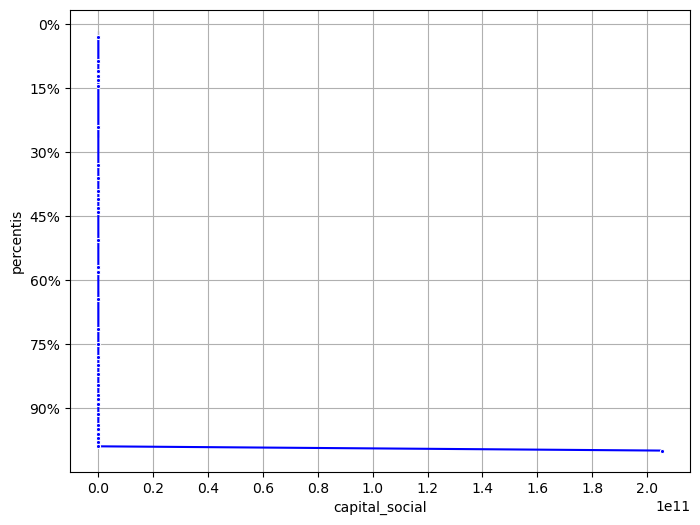

In [142]:
for col in percentil_df.columns:
    if col != 'Percentil':
        plot_functions.grafico_linhas(percentil_df[col],percentil_df['Percentil'],col,'percentis')

Histogramas:

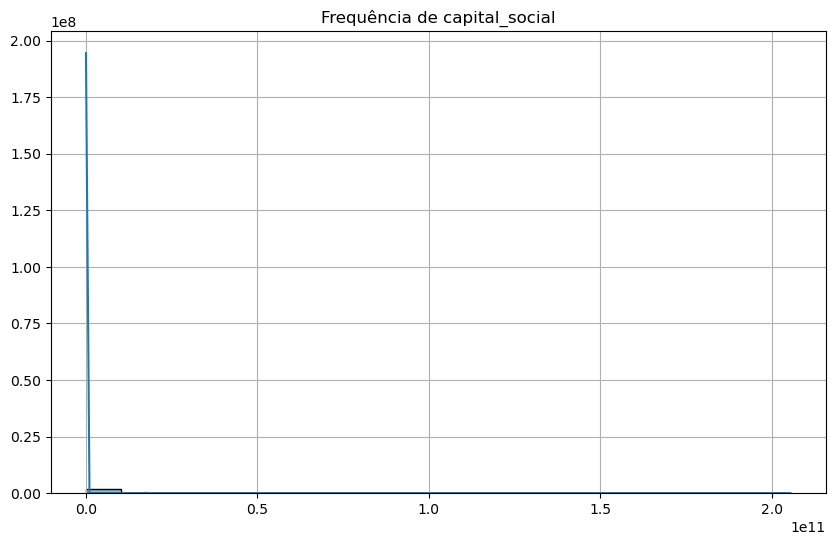

In [143]:
for col in df_n.columns:
    plot_functions.histograma(df_n,col,f'Frequência de {col}')

Scatterplot

In [144]:
incluso = []
for col1 in df_n.columns:
    incluso.append(col1)
    for col2 in df_n.columns:
        if col2 not in incluso:
            plot_functions.scatterplots(df_n, col1, col2)

Kernel Density Estimate - KDE

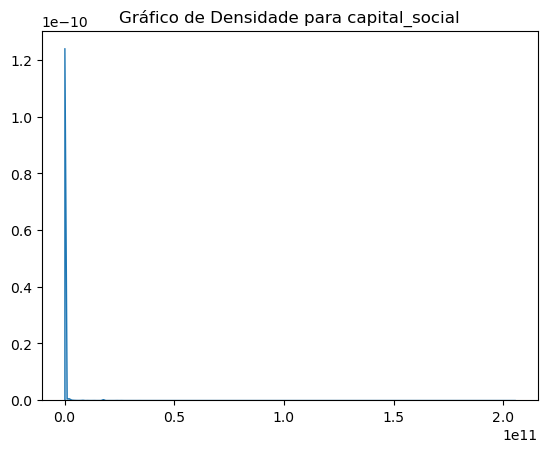

In [145]:
for col in df_n.columns:
    sns.kdeplot(df_n[col], fill=True)
    plt.title(f'Gráfico de Densidade para {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Identificação de Outlier - pontos fora do intervalo interquartis.

In [146]:
# Calcular os limites para outliers em cada coluna numérica
outlier_indices = {}
m = 1.5
for col in df_n.columns:
    Q1 = df_n[col].quantile(0.25)
    Q3 = df_n[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - m * IQR
    upper_bound = Q3 + m * IQR
    outliers = df_n[(df_n[col] < lower_bound) | (df_n[col] > upper_bound)].index.tolist()
    outlier_indices[col] = outliers

# Exibir os índices de outliers para cada coluna
for col, indices in outlier_indices.items():
    print(f"Índices de outliers na coluna '{col}'")
    proporção = len(indices)*100/len(df_n)
    print(f'{proporção:.2f}% do dataset foi identificado como outliers na variável "{col}" usando {m} vezes os 2º e 3º quartis.')

Índices de outliers na coluna 'capital_social'
17.13% do dataset foi identificado como outliers na variável "capital_social" usando 1.5 vezes os 2º e 3º quartis.


Matriz de correlação:

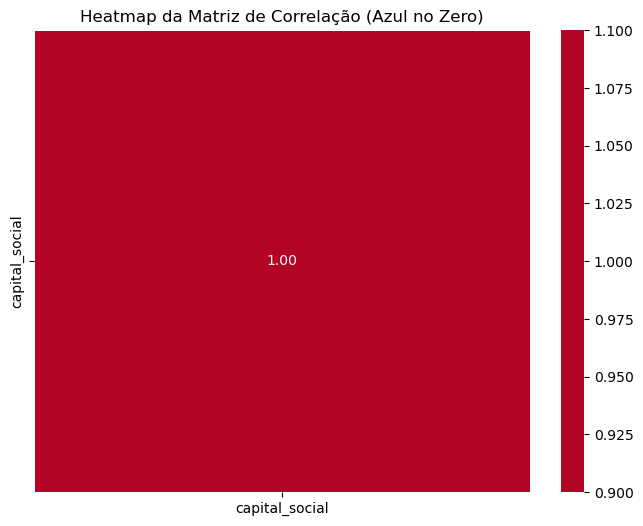

In [147]:
# "Quente" nas extremidades
plot_functions.correlação_heatmap(df_n)

## Variáveis categóricas

Gráficos de barras:

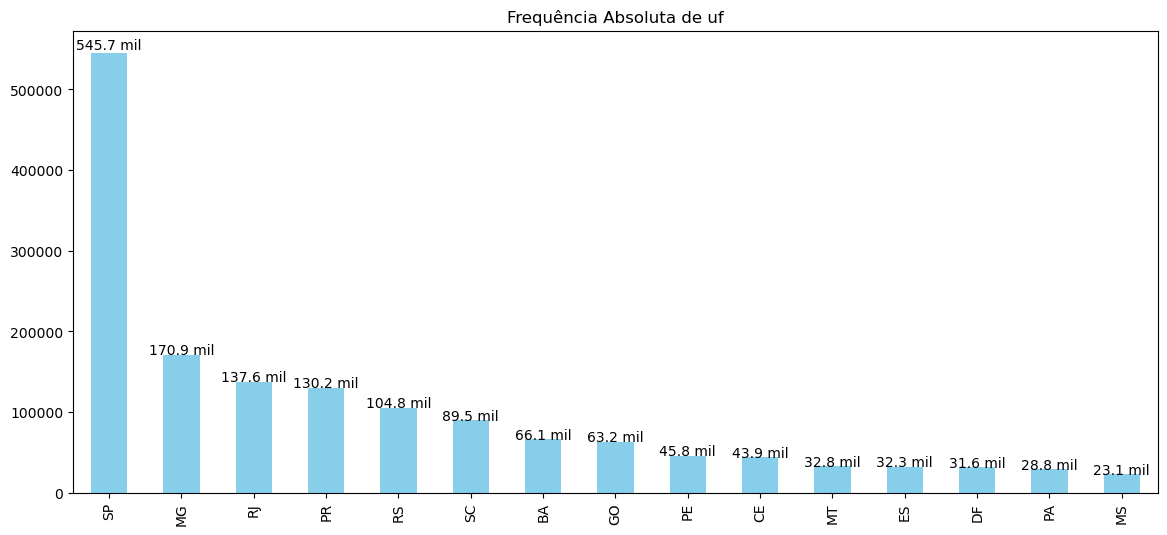

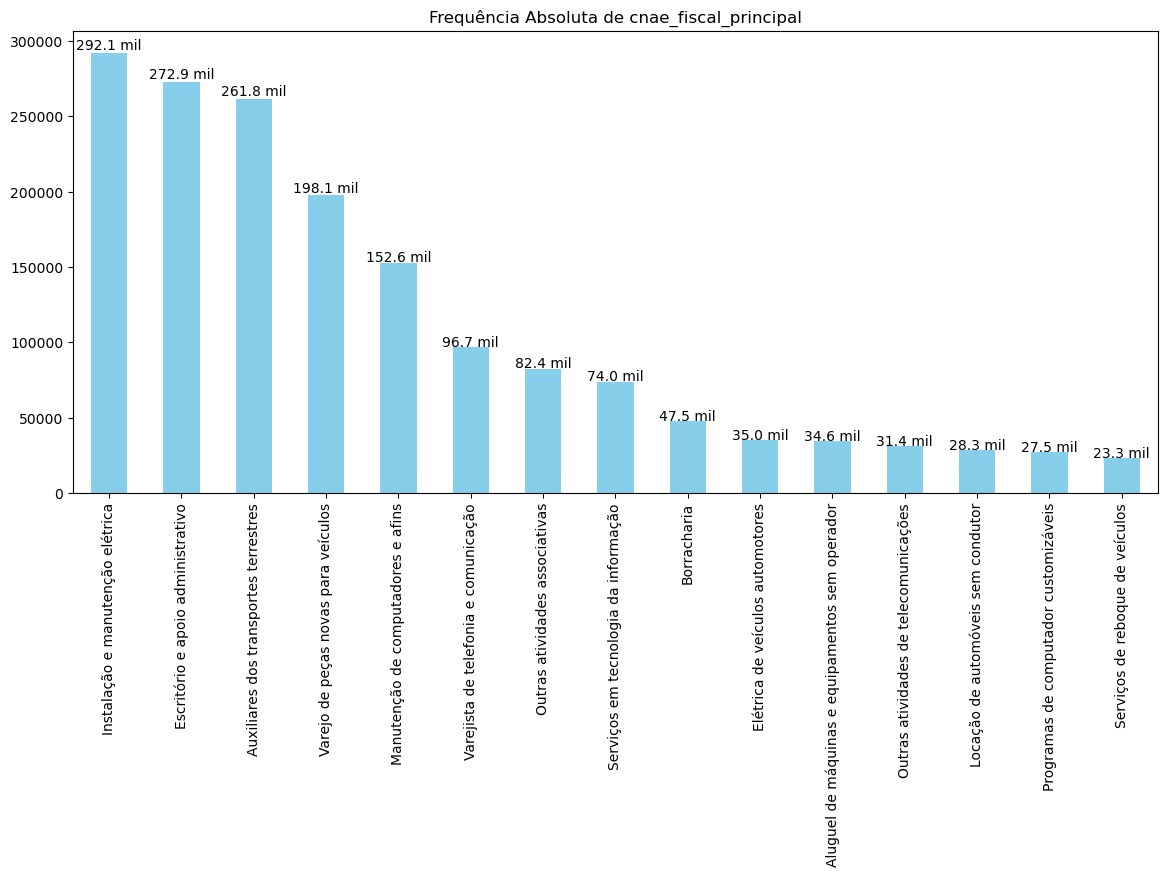

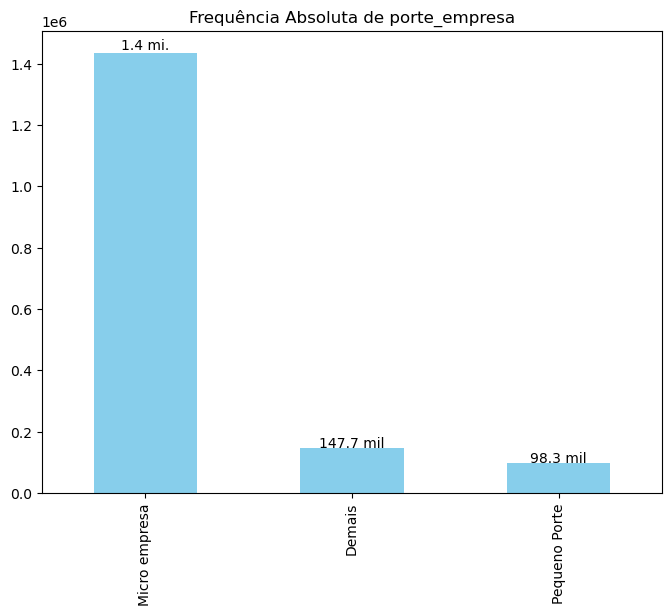

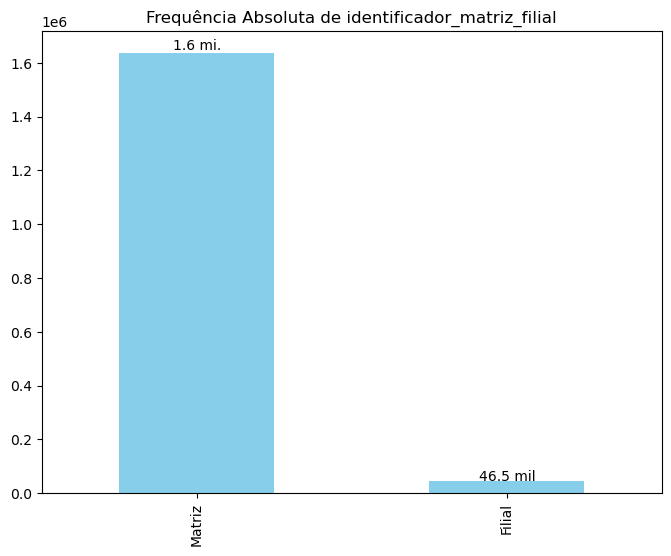

In [148]:
for col in df_c.columns:
    plot_functions.barras_absolutas(df_c[col])

Frequência relativa.

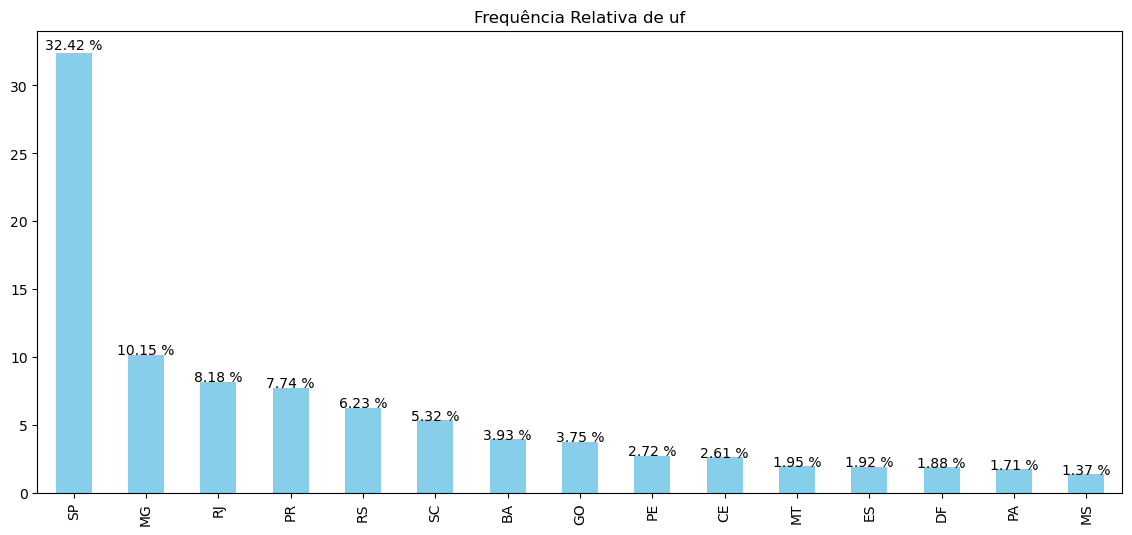

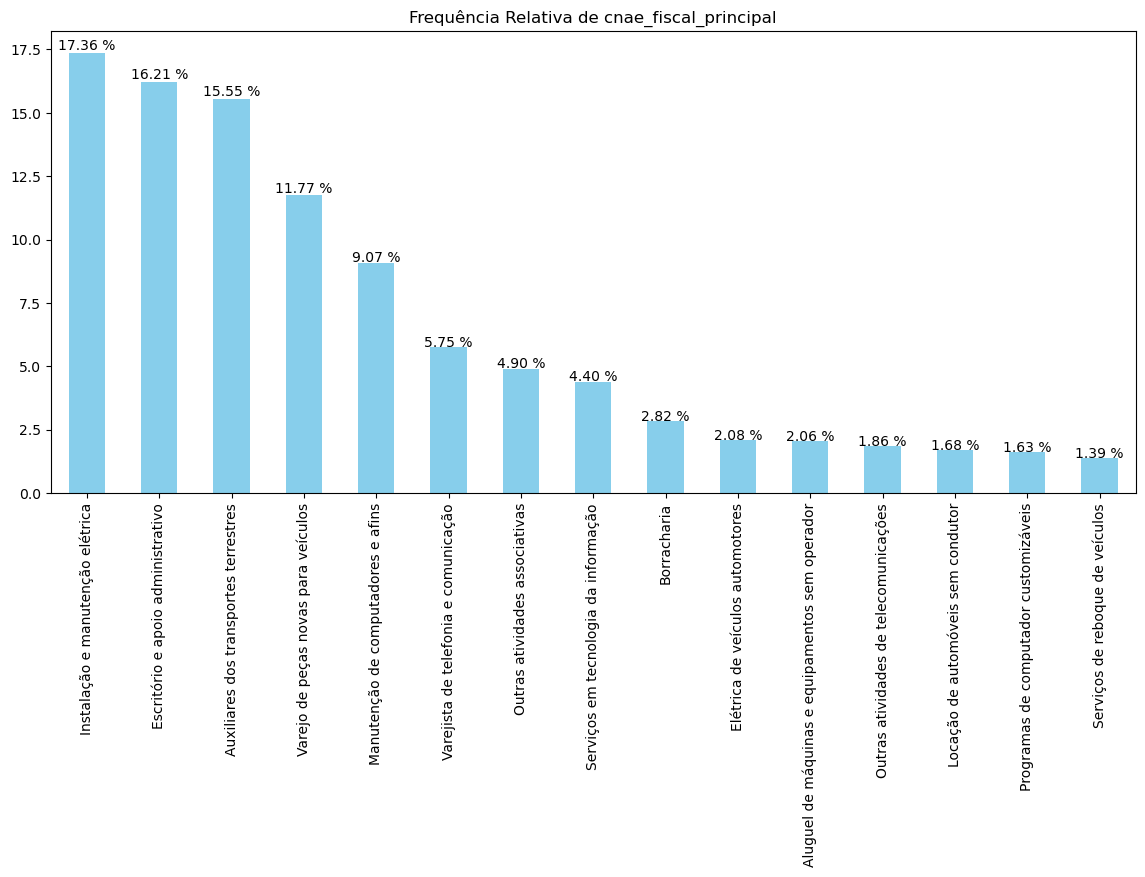

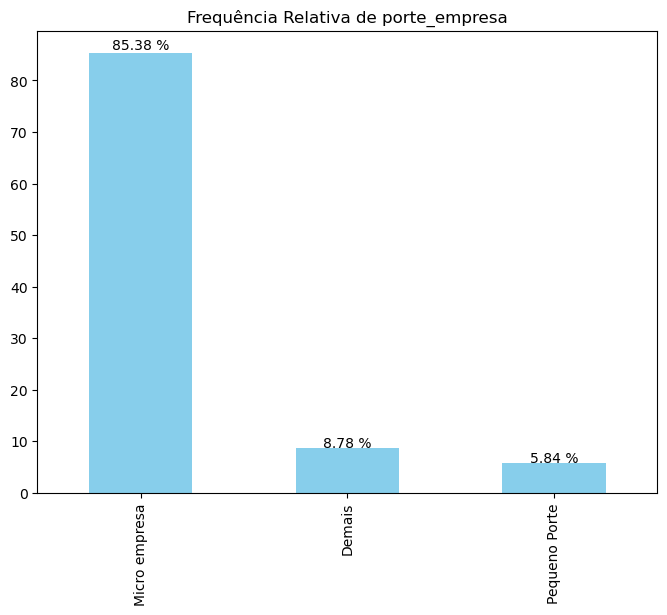

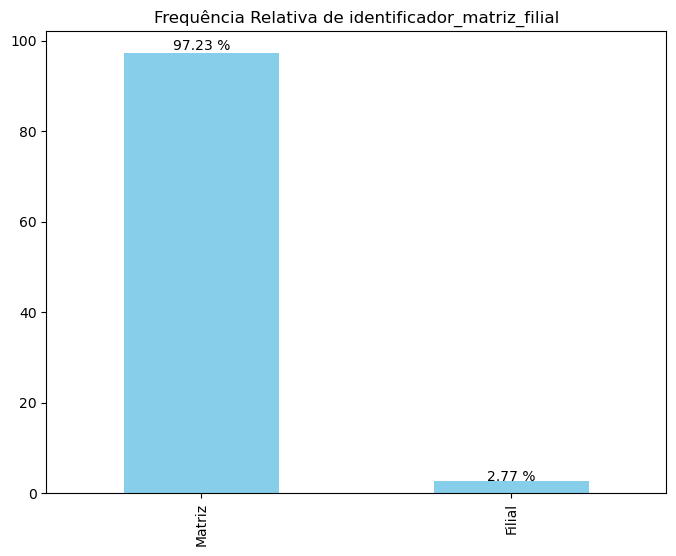

In [149]:
for col in df_c.columns:
    plot_functions.barras_percentuais(df_c[col])

Frequência por subcategorias.

<Figure size 2000x800 with 0 Axes>

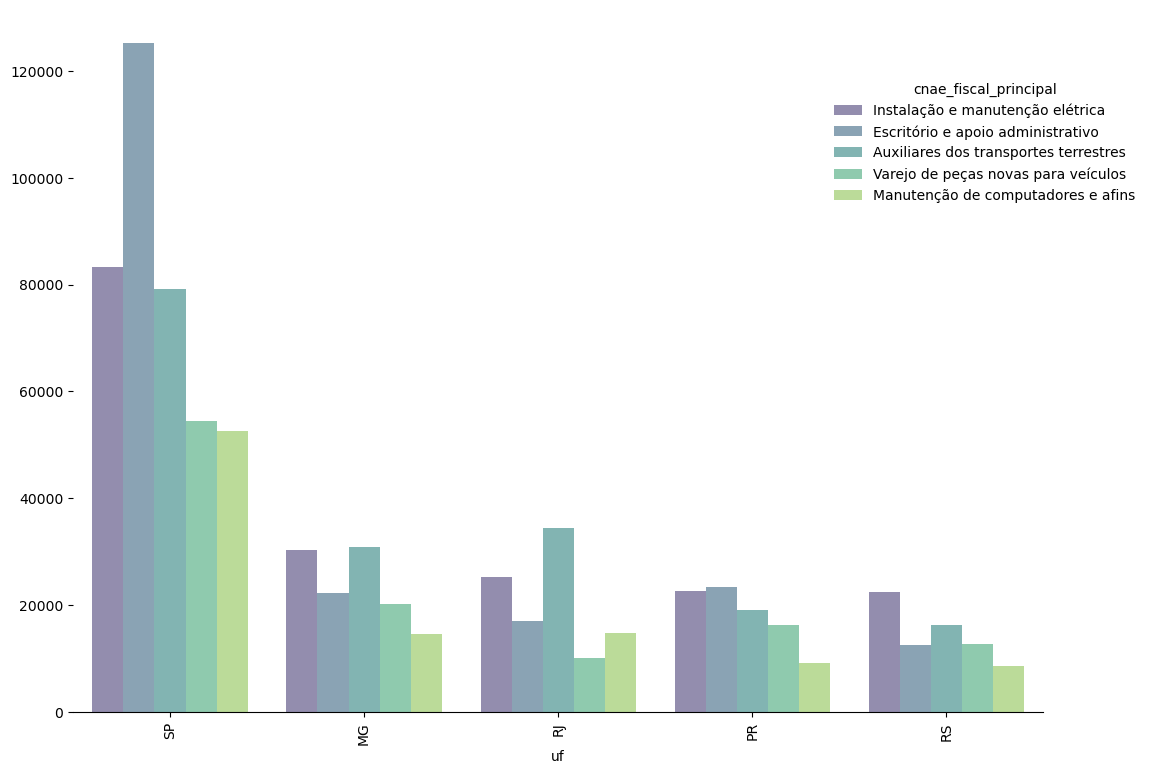

<Figure size 2000x800 with 0 Axes>

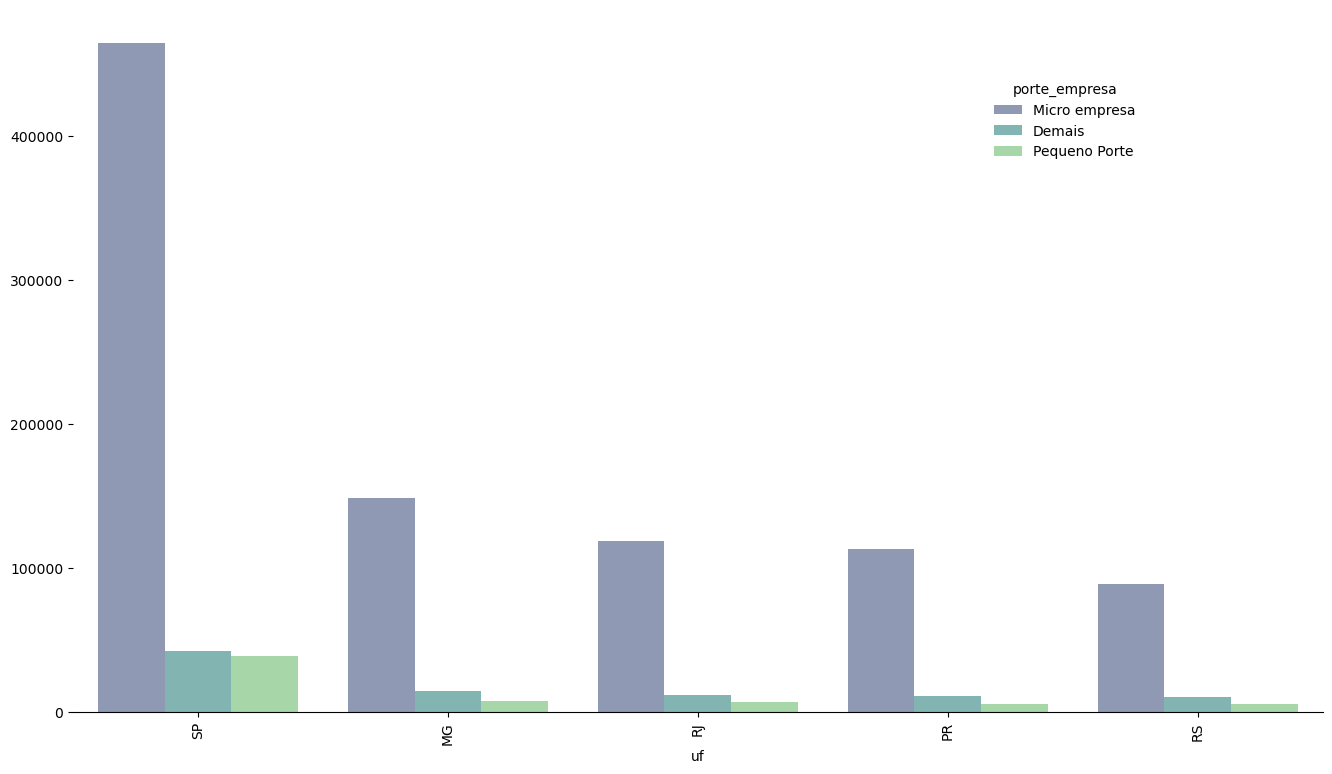

<Figure size 2000x800 with 0 Axes>

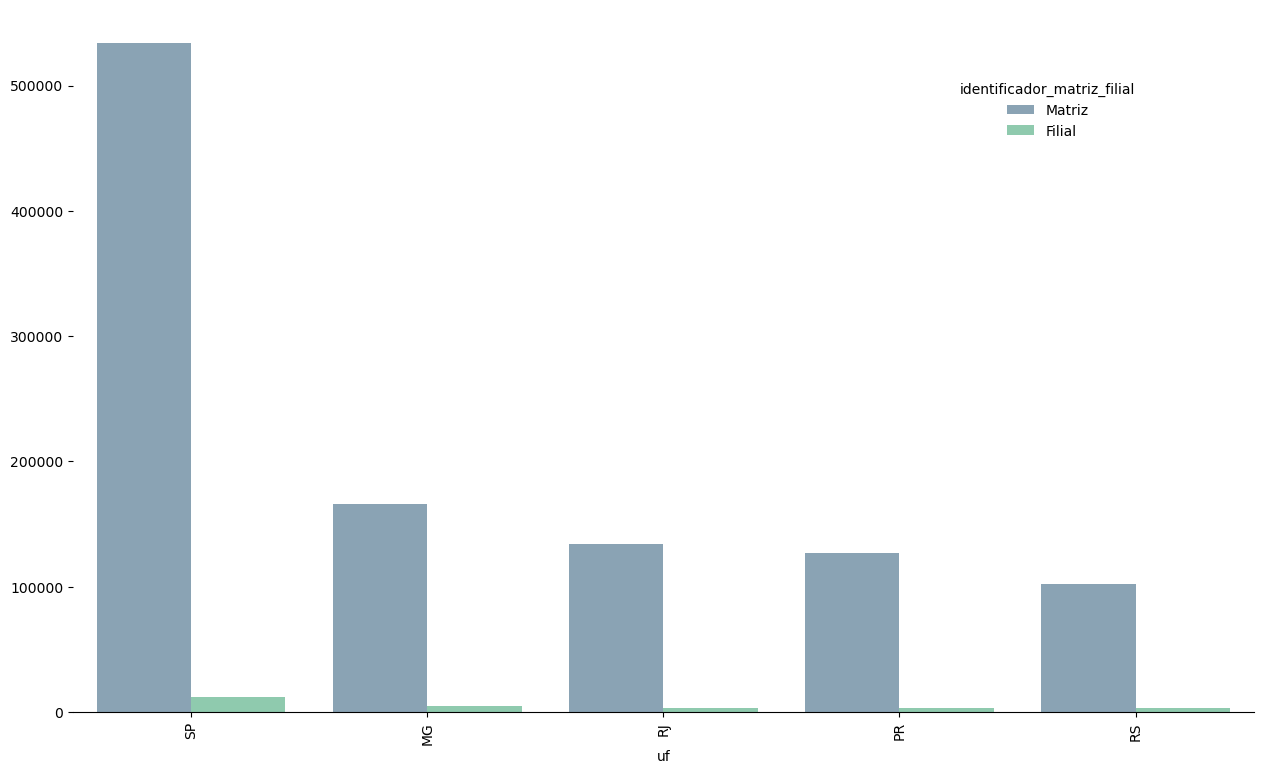

<Figure size 2000x800 with 0 Axes>

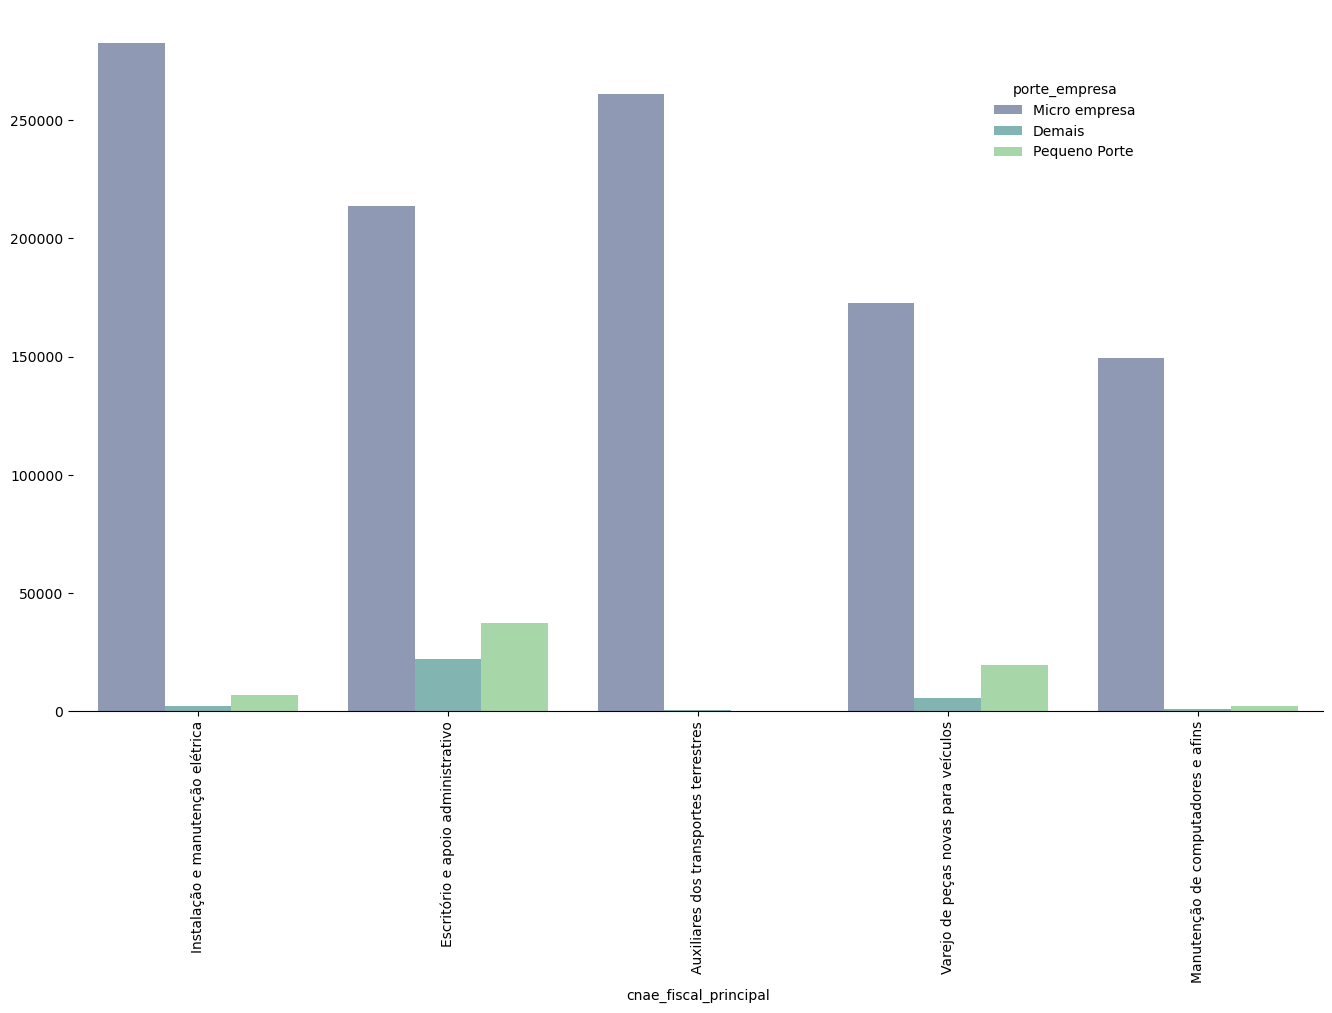

<Figure size 2000x800 with 0 Axes>

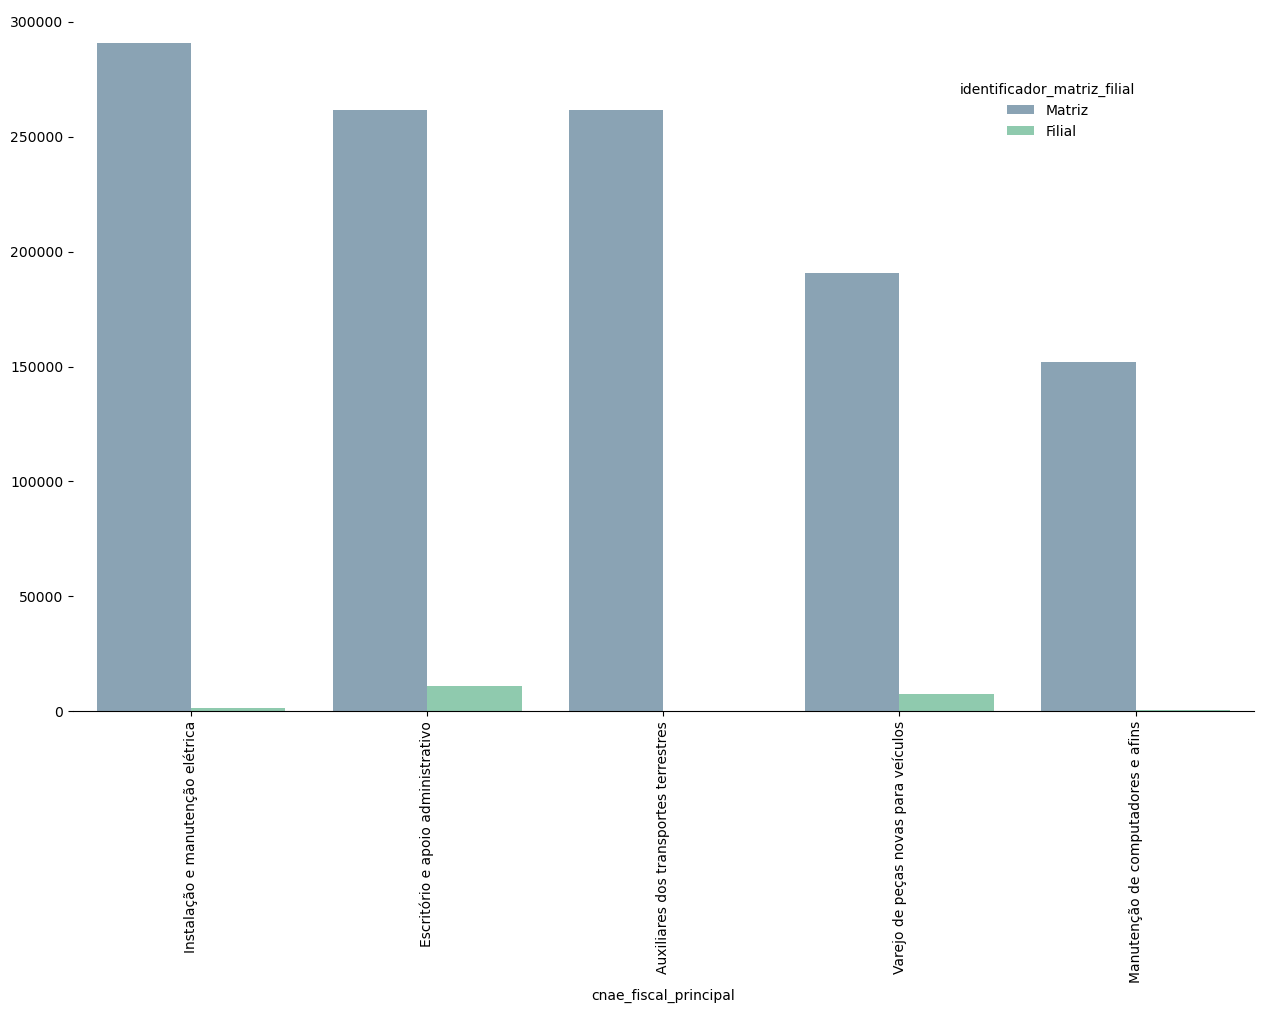

<Figure size 2000x800 with 0 Axes>

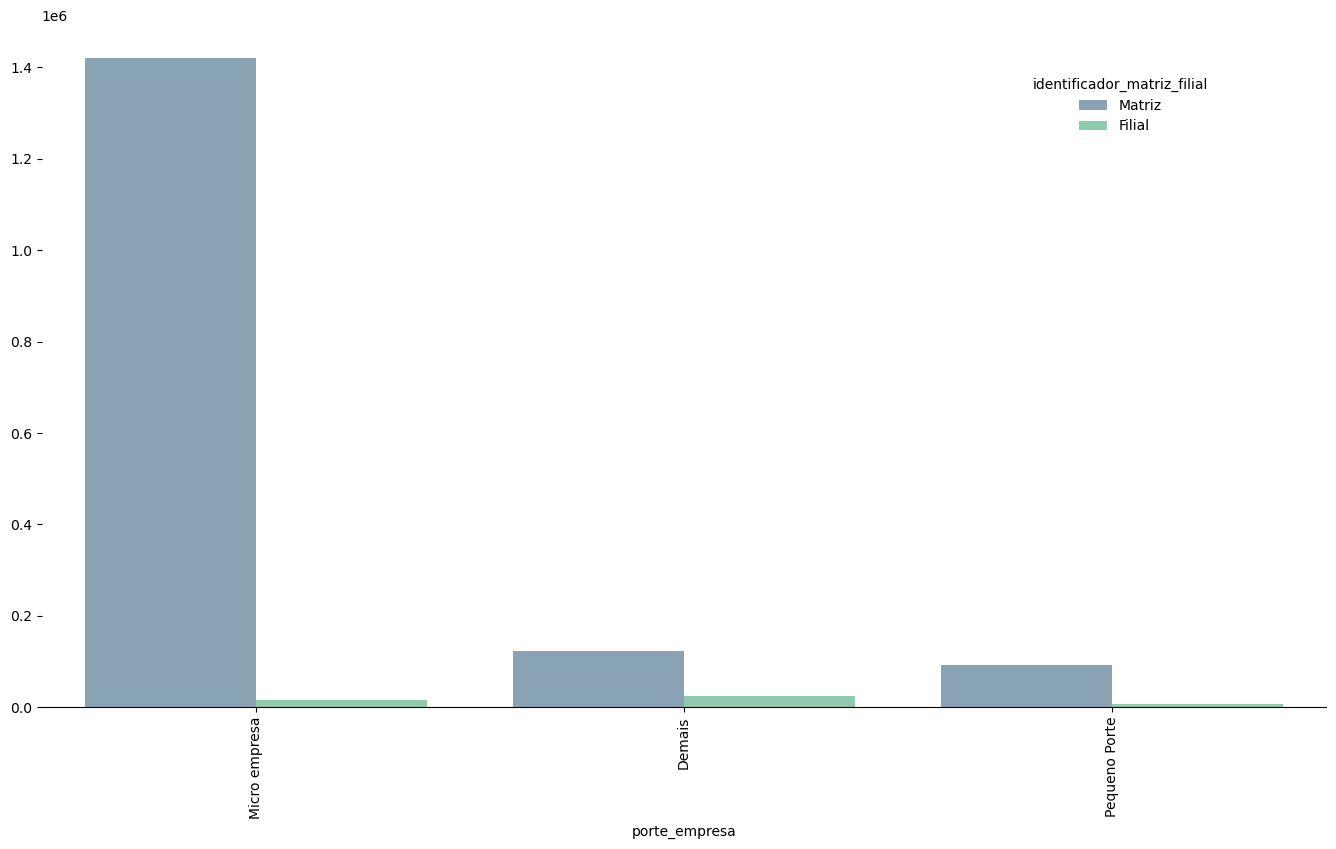

In [180]:
incluso = []
for grupo in df_c.columns:
    incluso.append(grupo)
    for categoria in df_c.columns:
        if categoria not in incluso:
            plot_functions.barras_agregadas(df_c,grupo,categoria,top_n=(5,5))

Contingência percentual

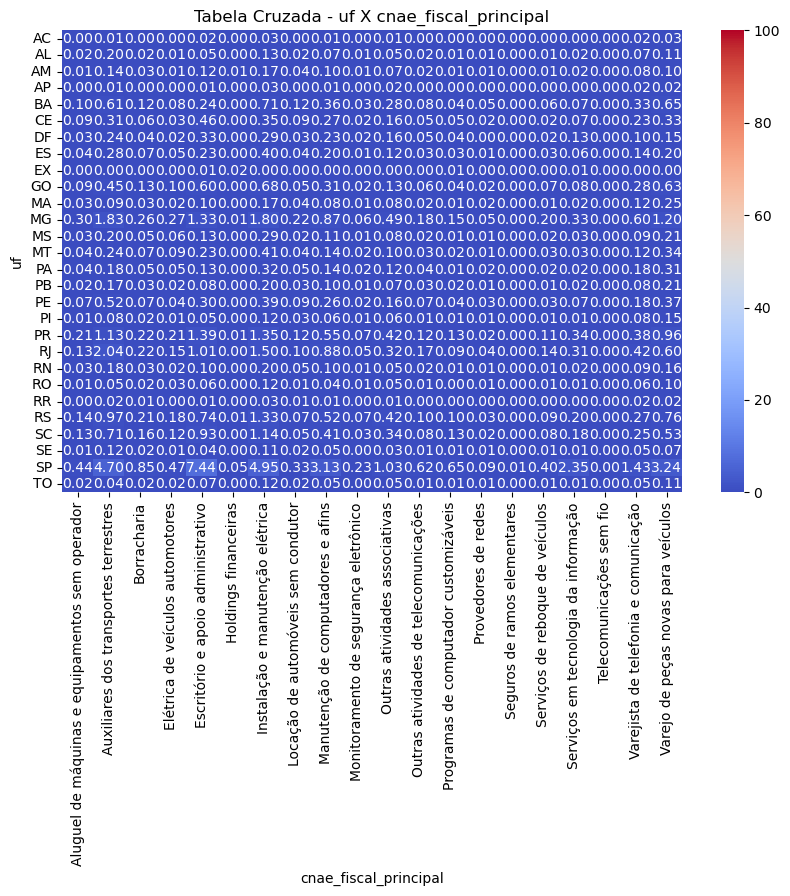

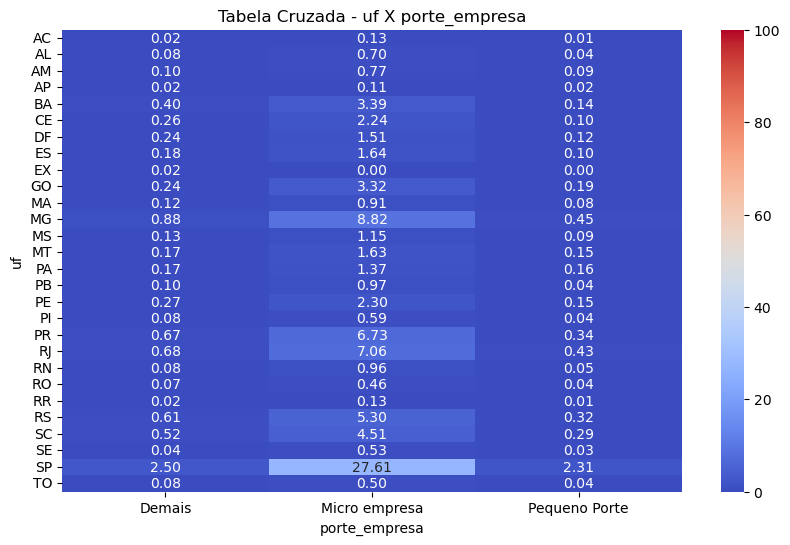

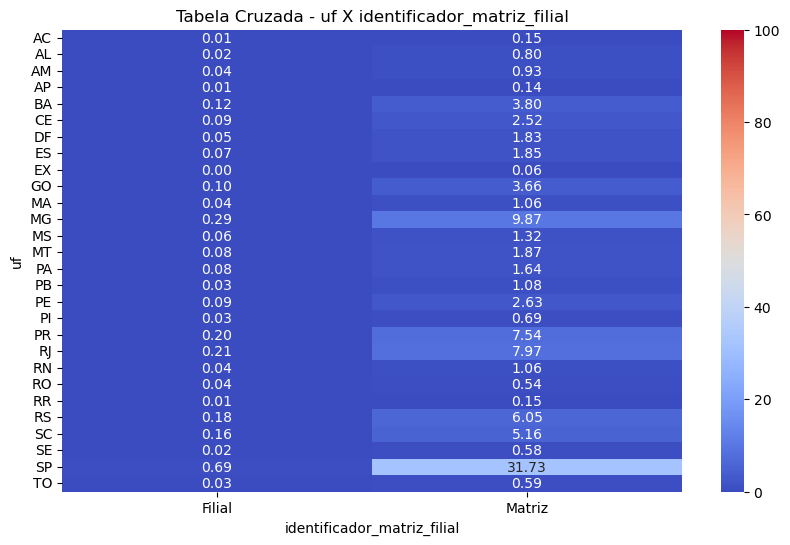

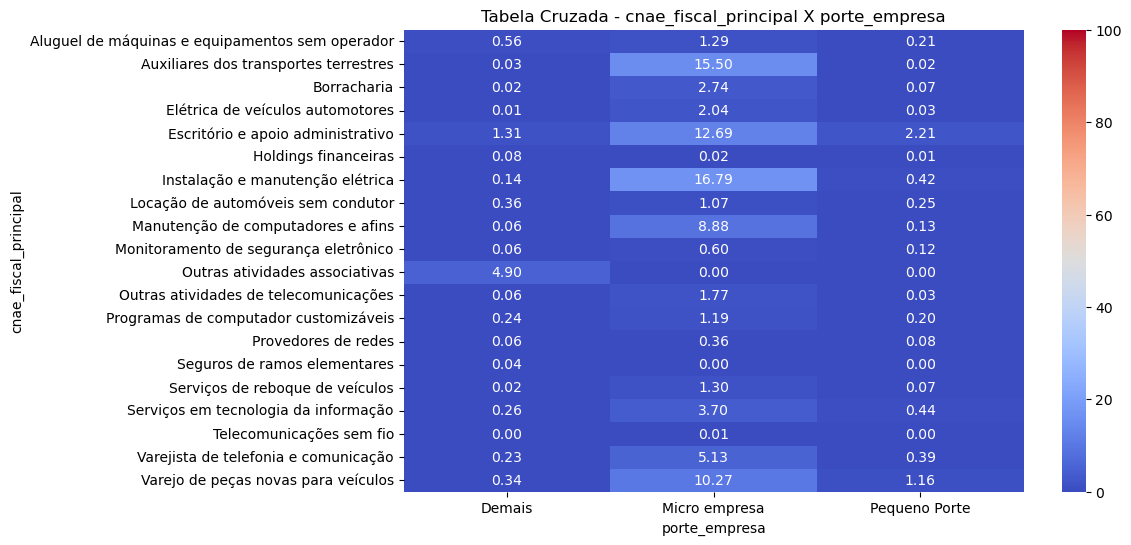

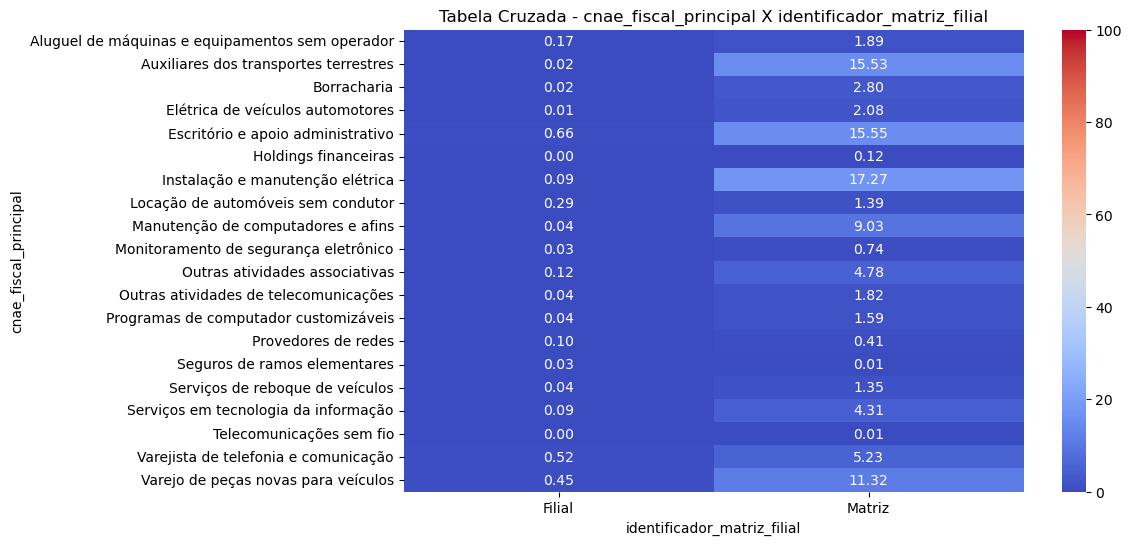

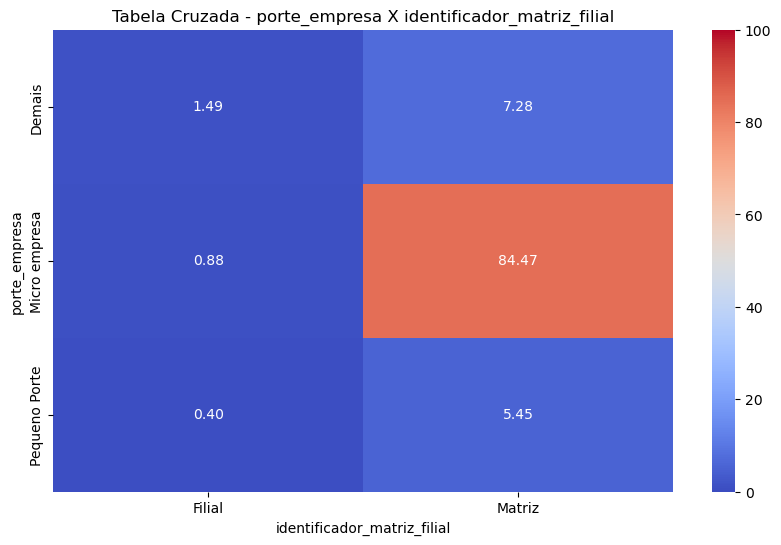

In [181]:
incluso = []
for coluna1 in df_c.columns:
    incluso.append(coluna1)
    for coluna2 in df_c.columns:
        if coluna2 not in incluso:
            plot_functions.contingência(df,coluna1,coluna2)

## Variáveis numéricas filtradas por categorias

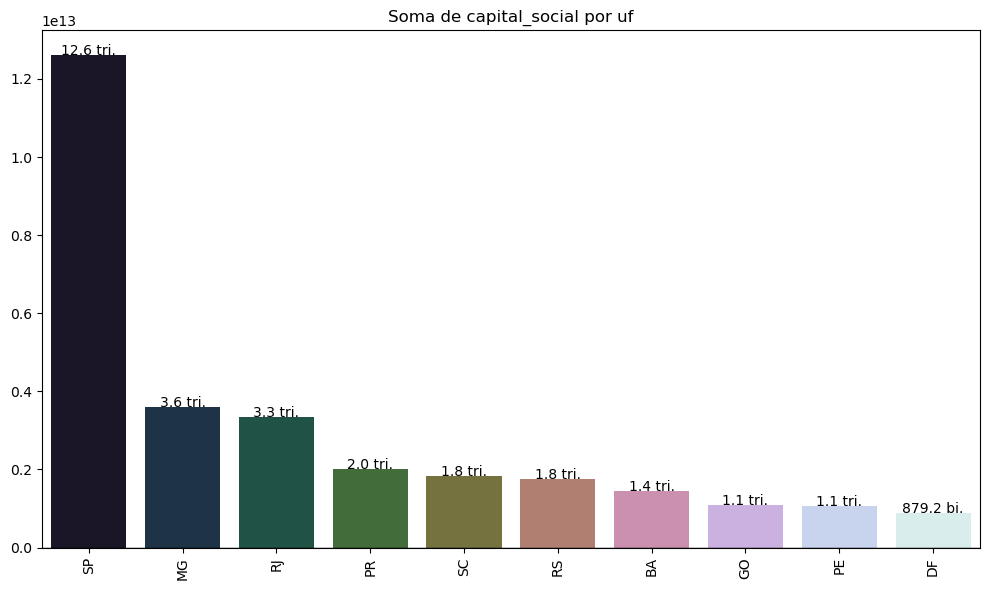

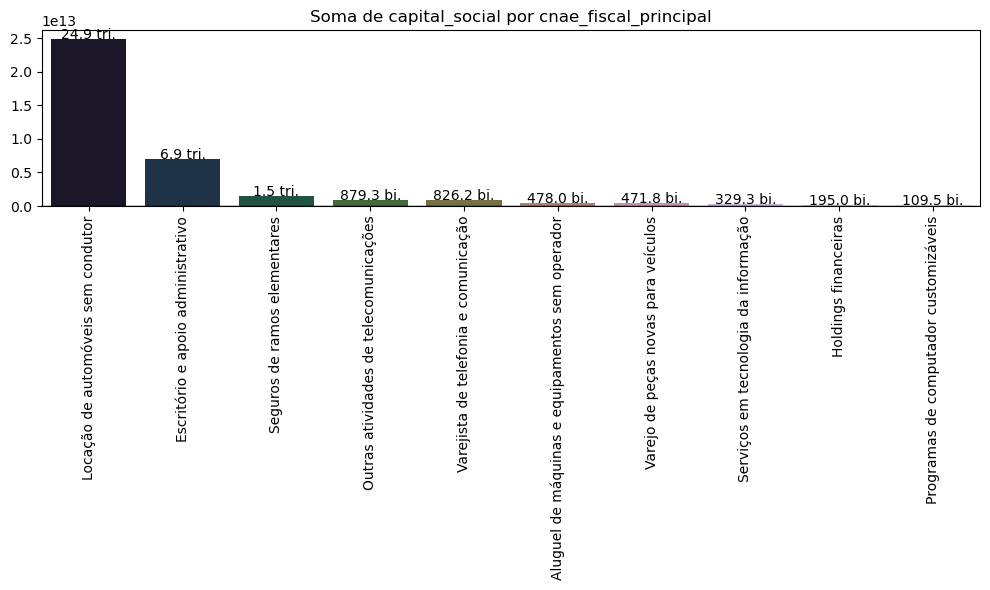

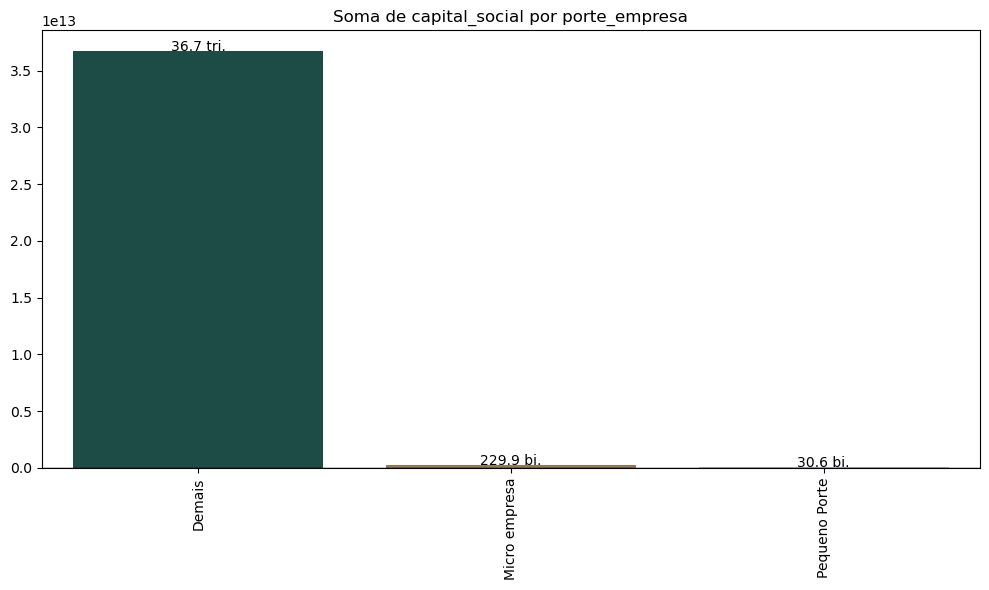

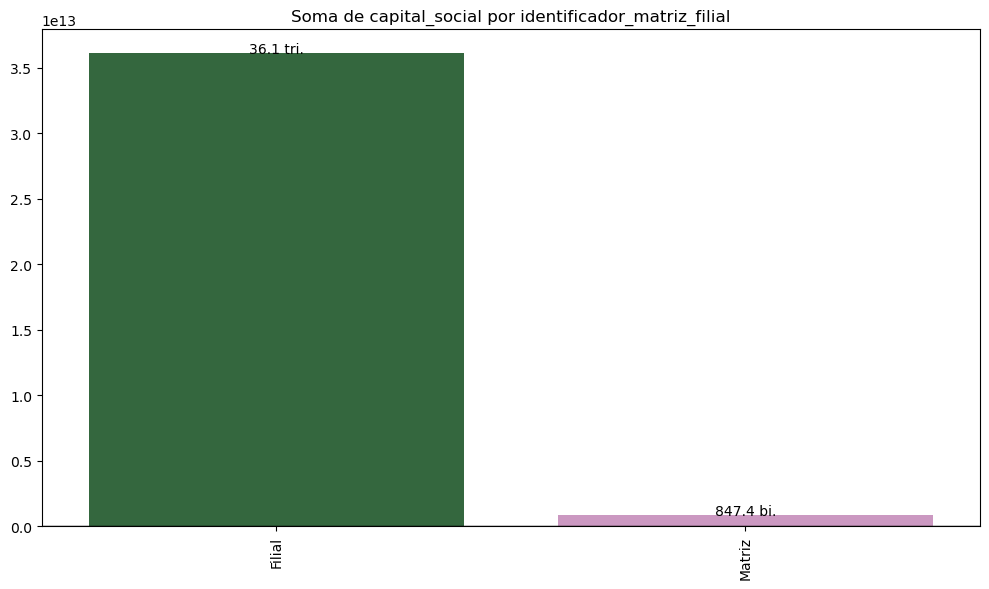

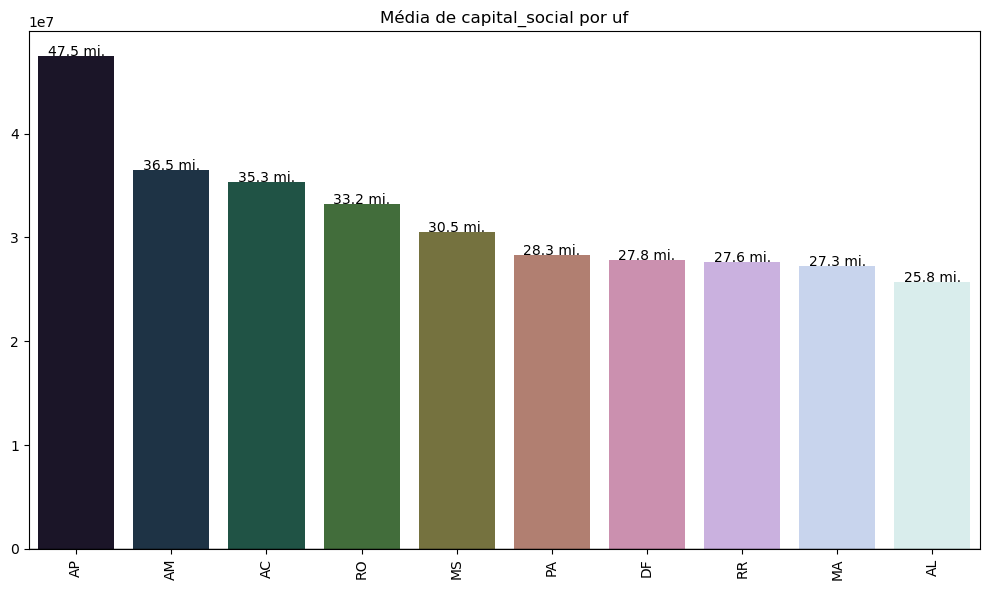

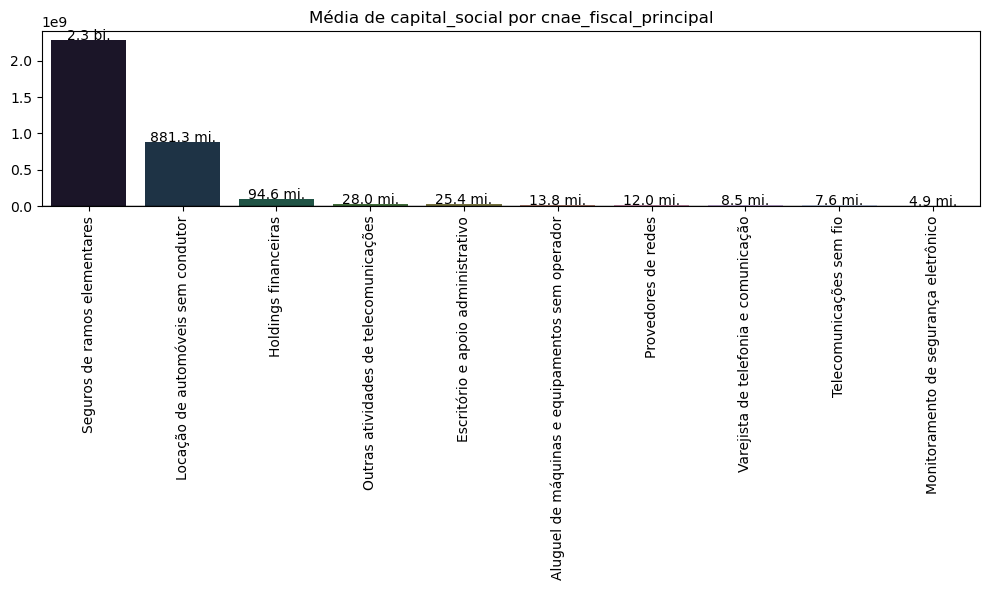

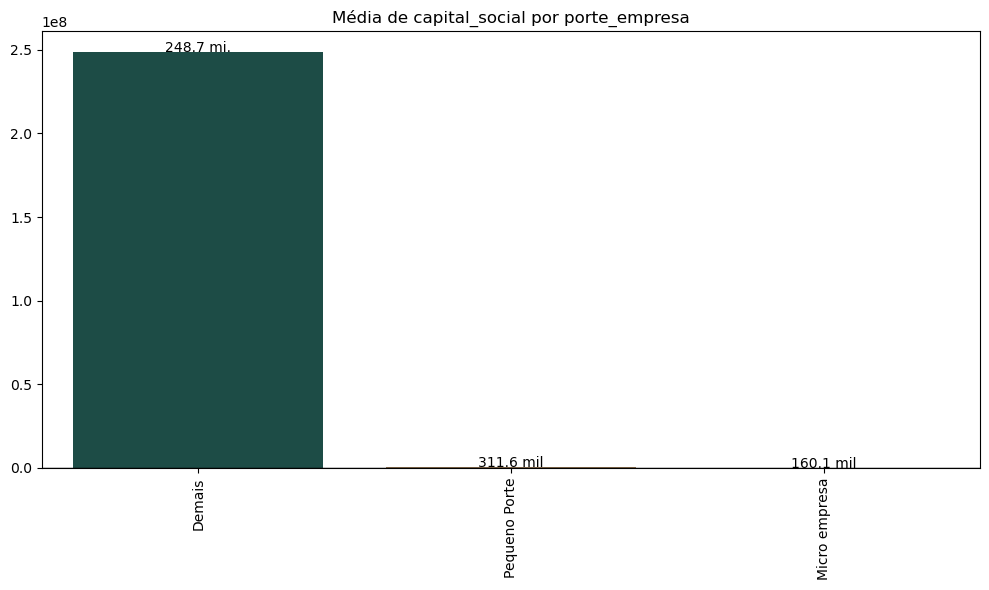

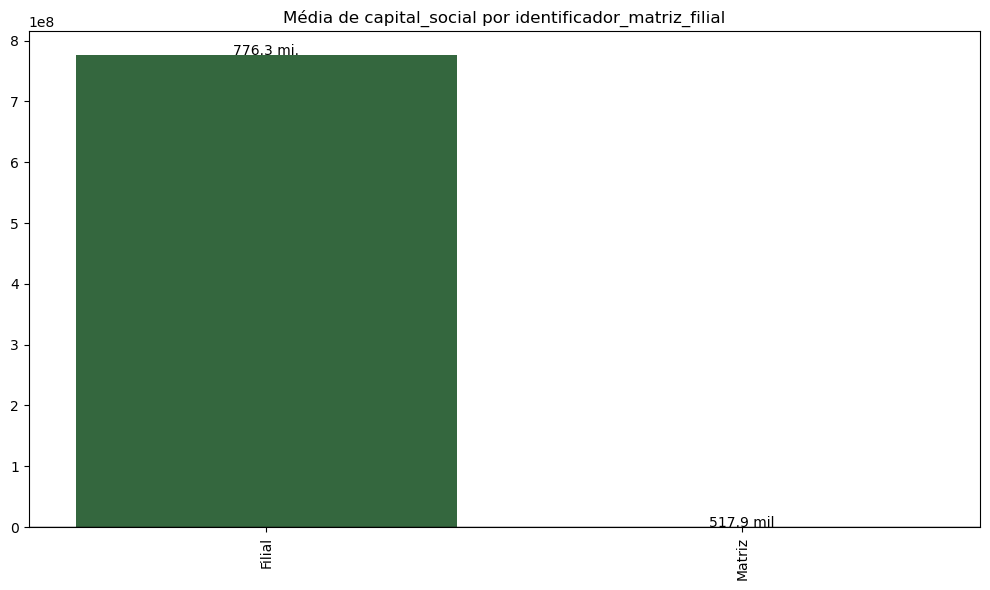

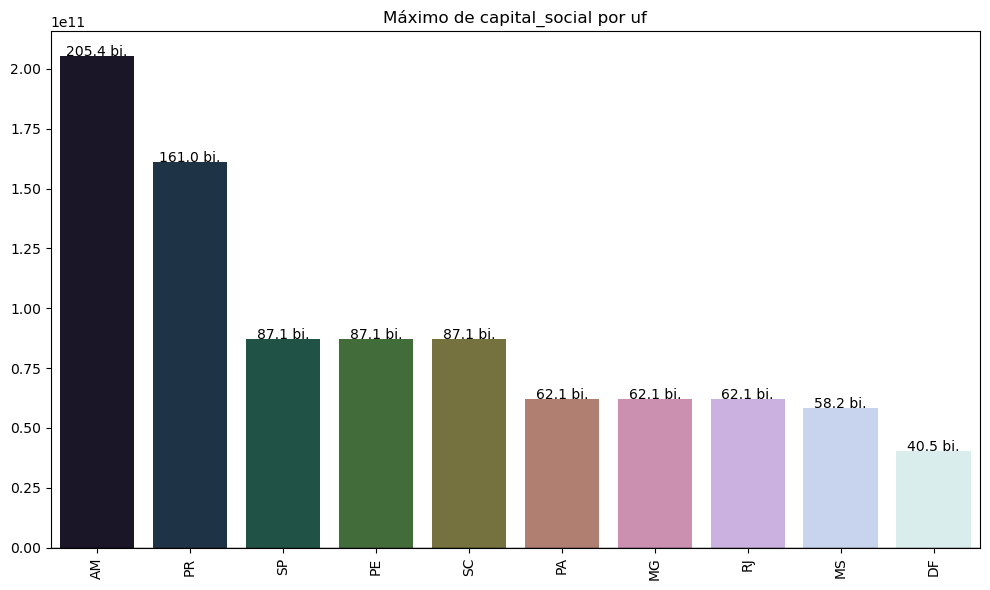

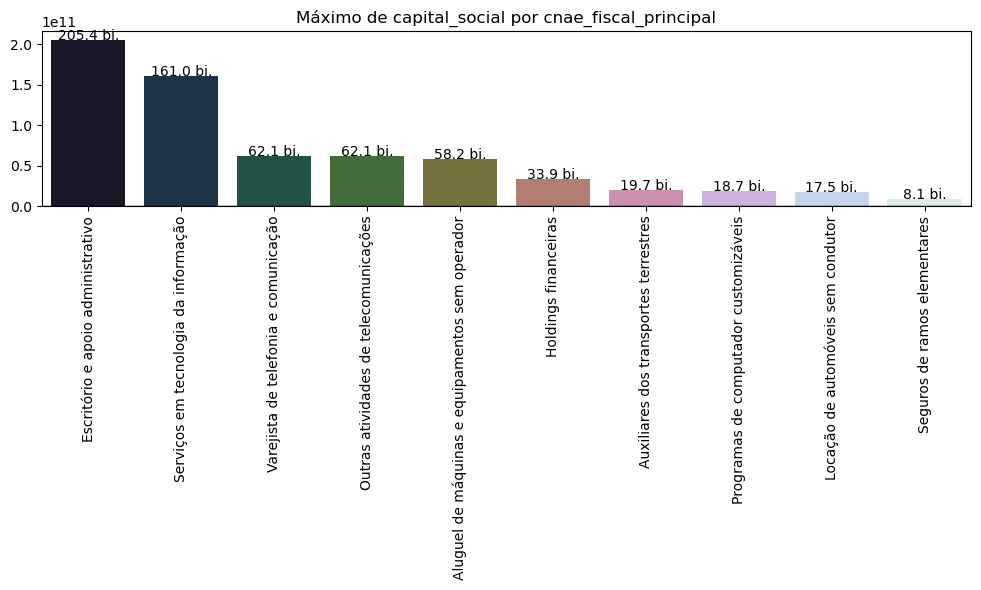

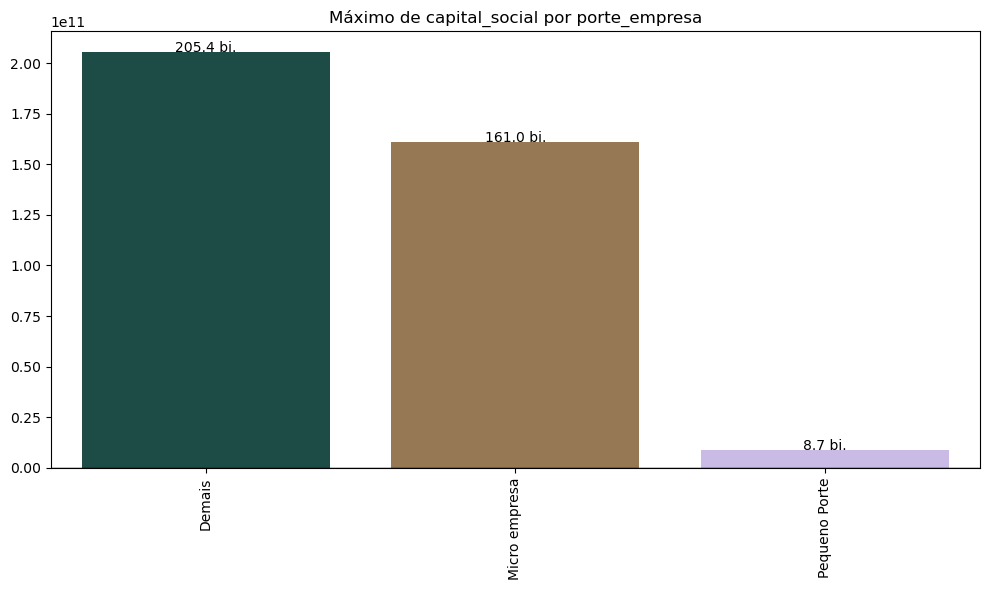

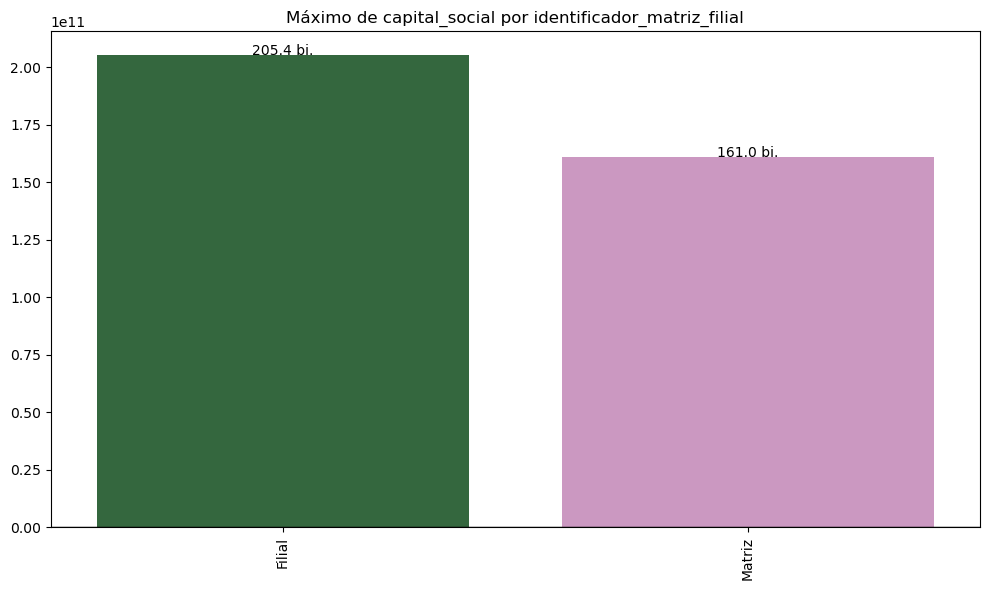

In [182]:
n_vars = df_n.columns
c_vars = df_c.columns

medidas = ('Soma','Média','Máximo')

for medida in medidas:
    for Categoria in c_vars:
        for Valor in n_vars:
            plot_functions.valor_por_categorias(df_t,Categoria,Valor,medida)

# Investigação de dados anômalos

A concentração de valores "0" na variável "capital social" sucita dúvidas sobre a integridade dos dados e exige uma investigação pormenorizada.

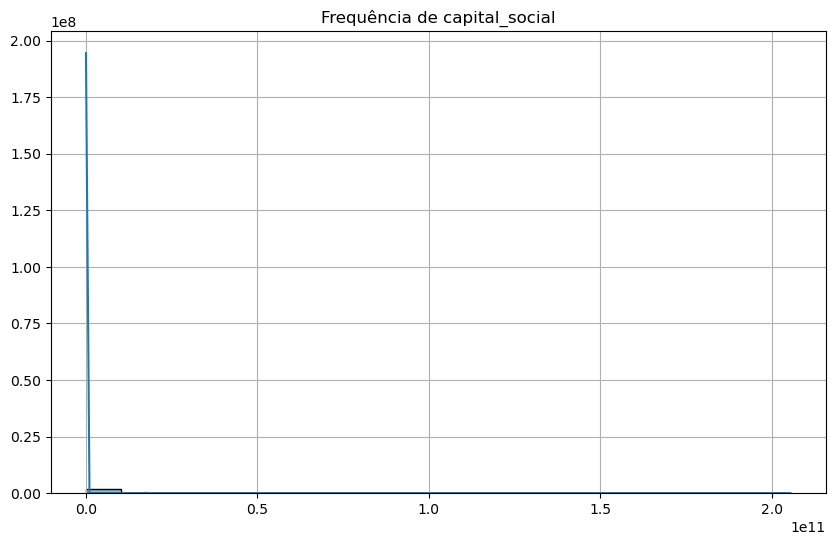

In [183]:
for col in df_n.columns:
    plot_functions.histograma(df_n,col,f'Frequência de {col}')

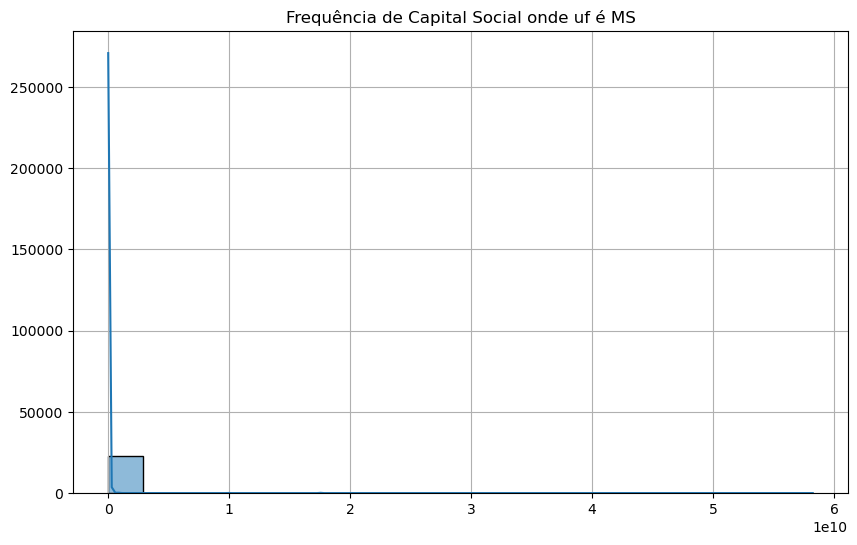

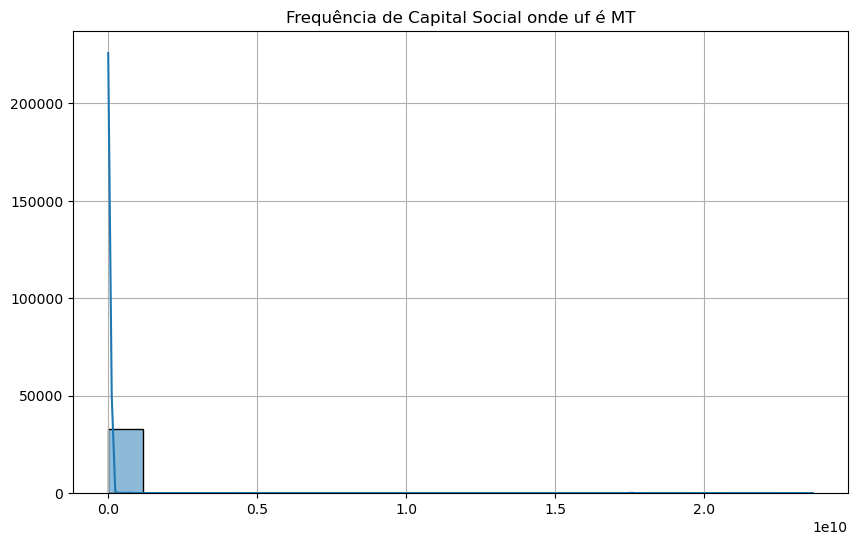

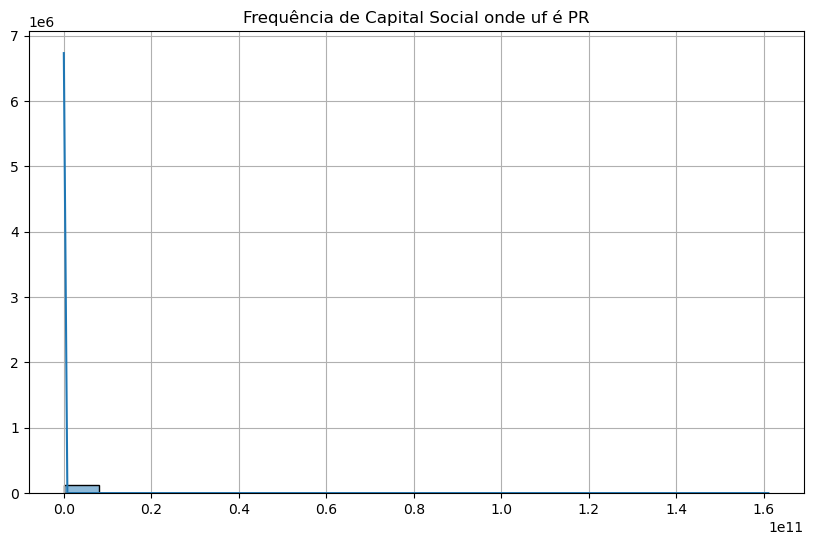

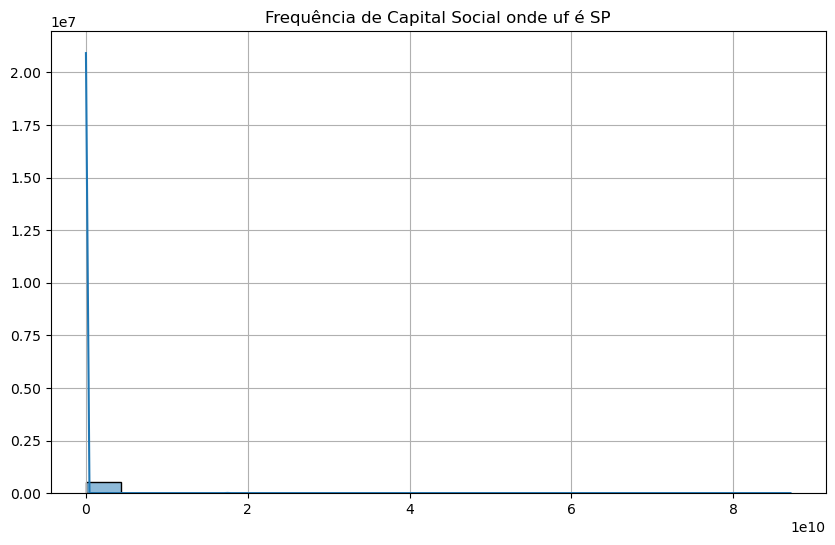

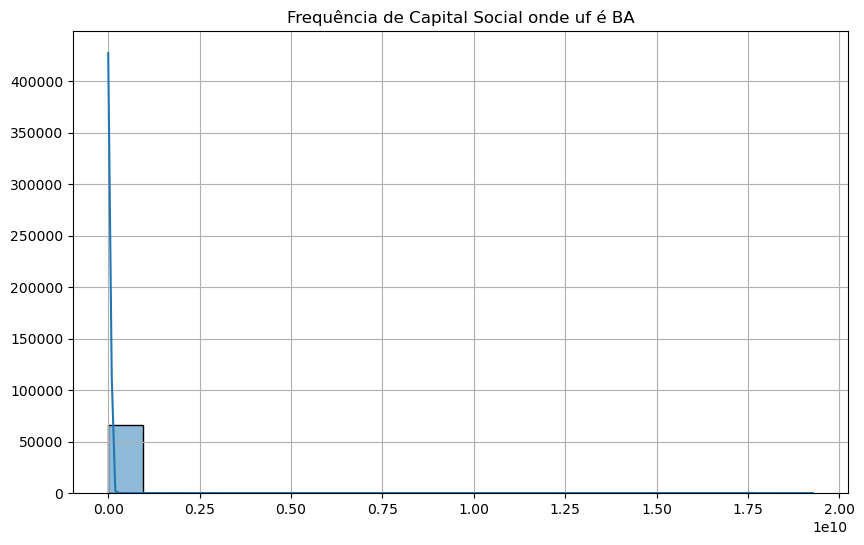

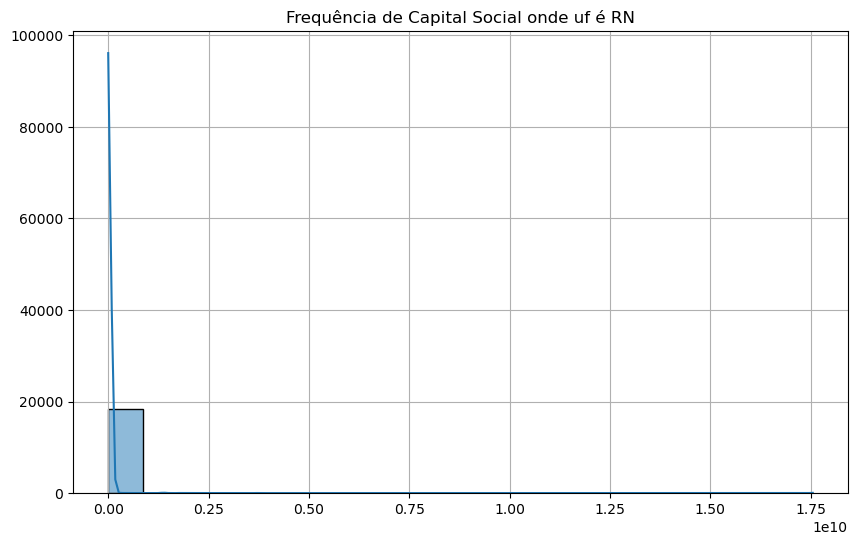

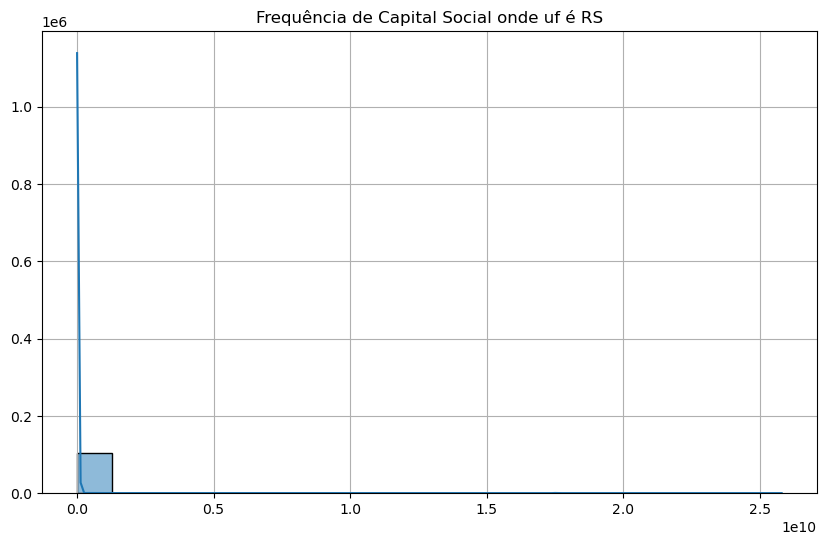

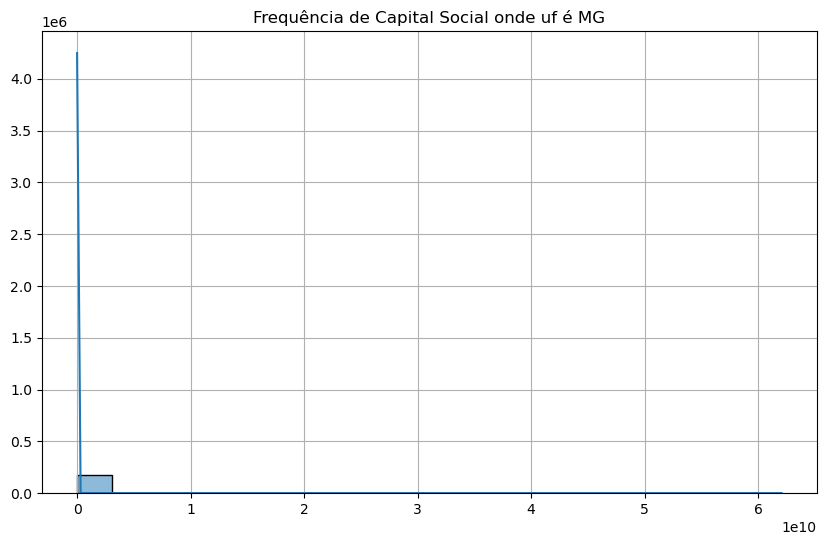

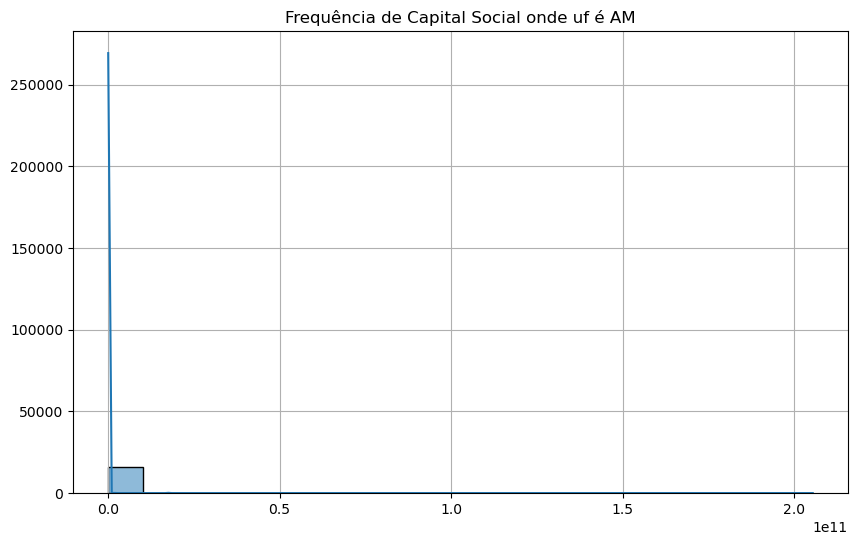

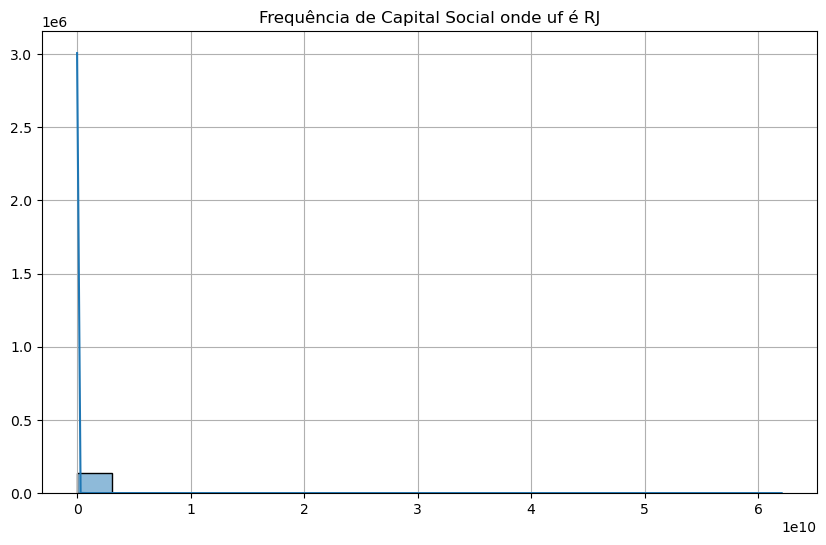

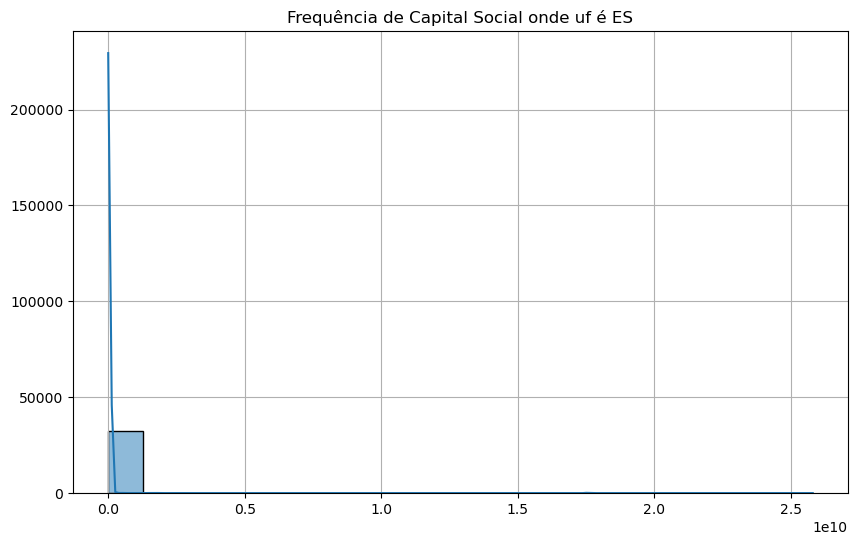

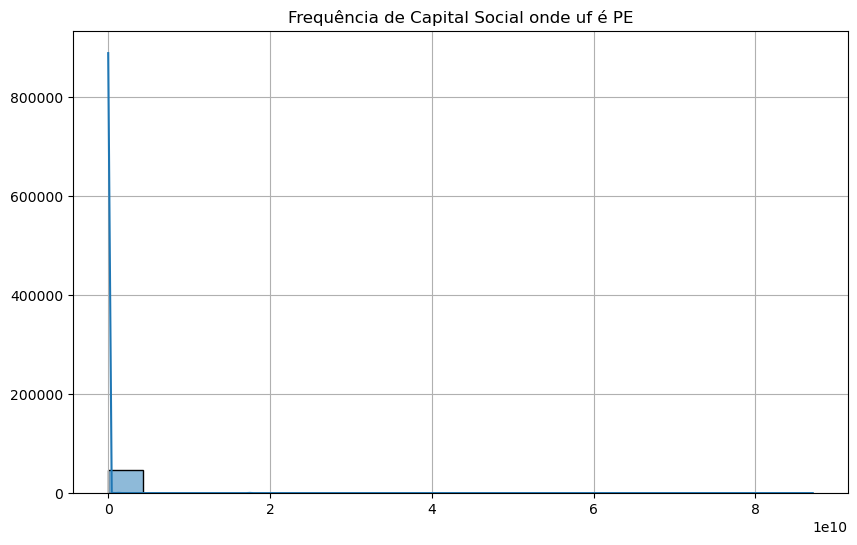

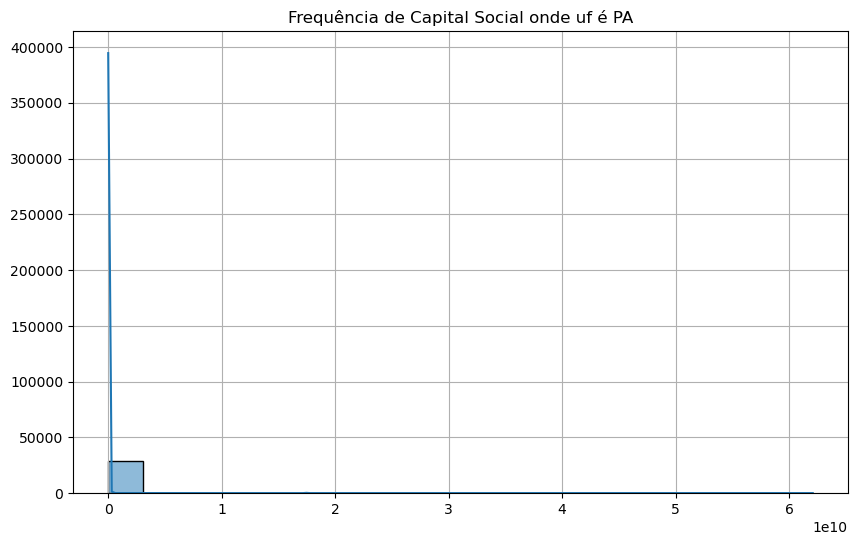

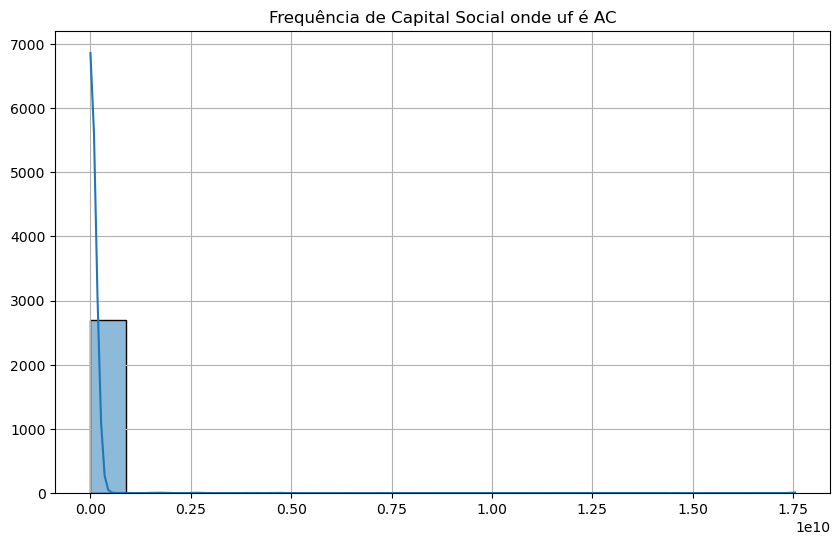

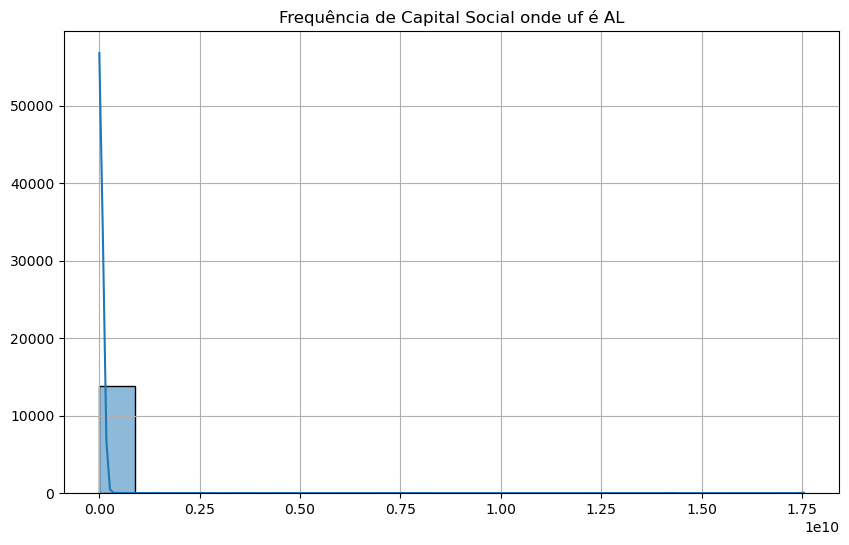

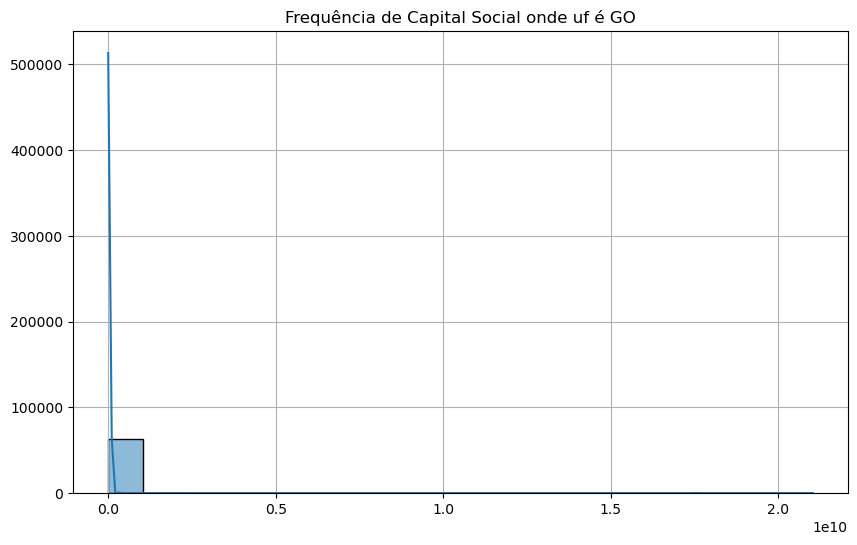

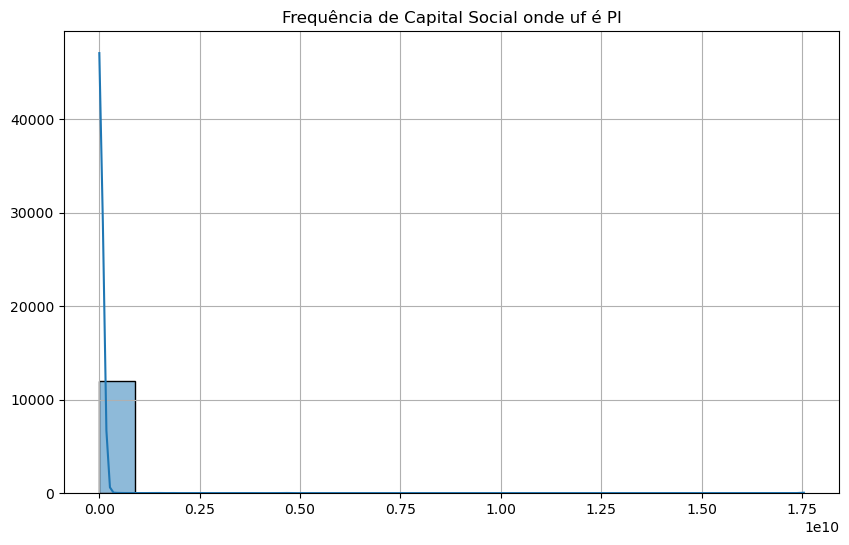

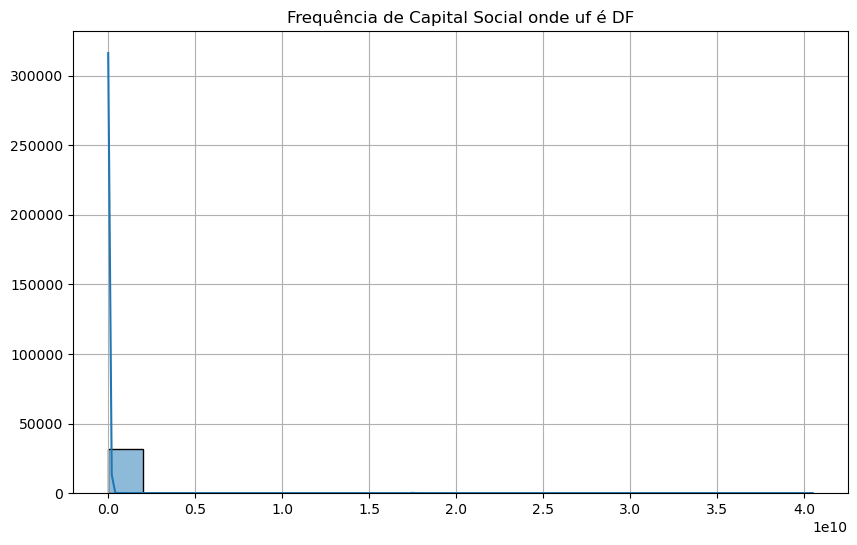

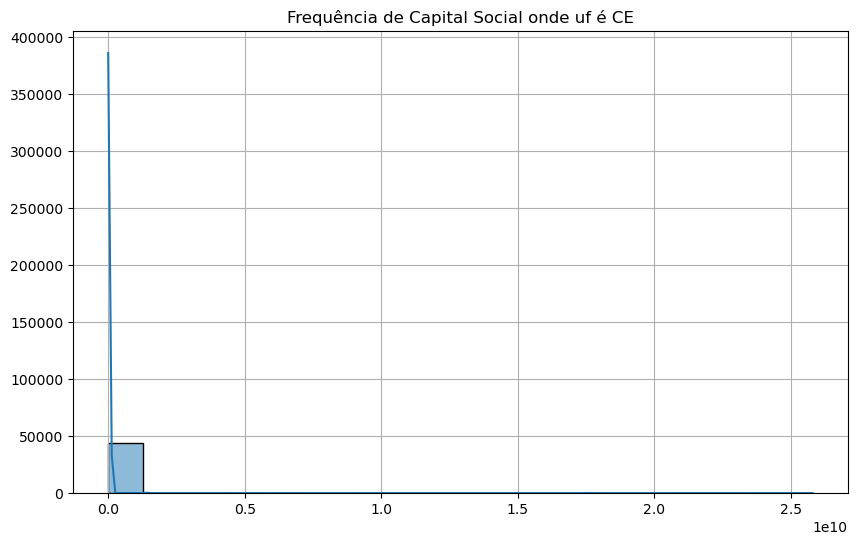

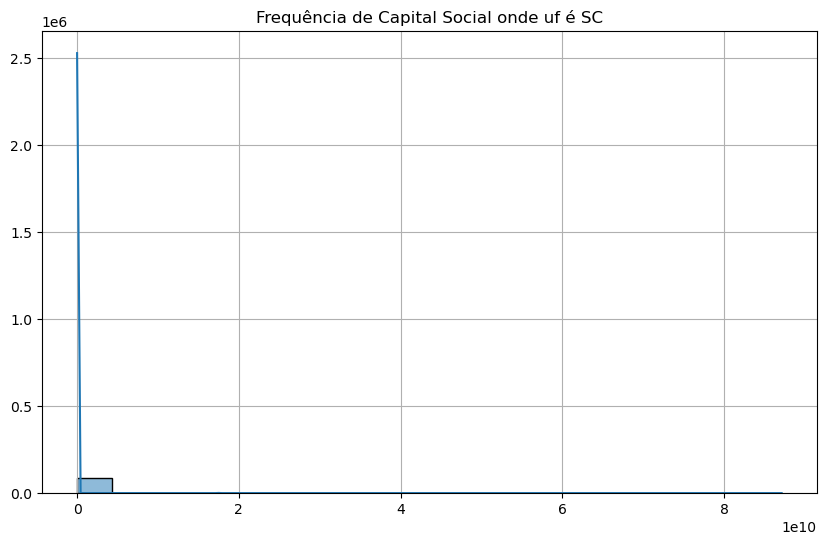

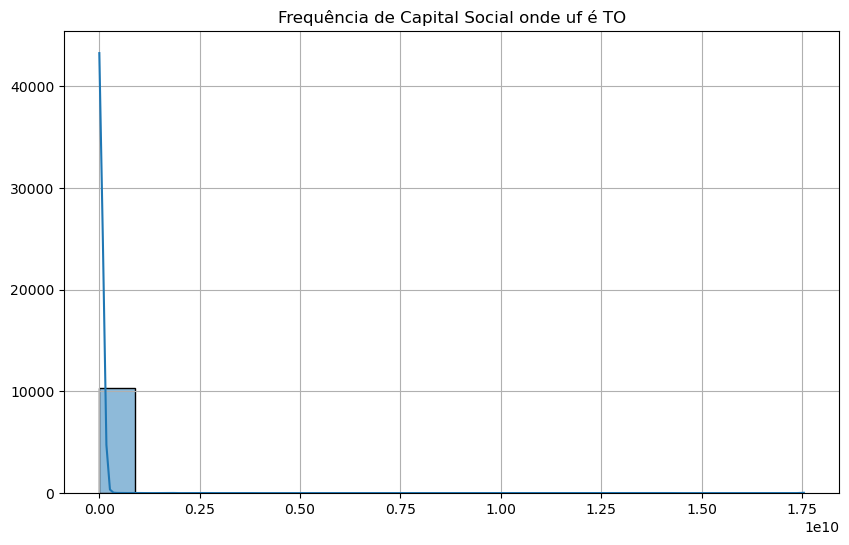

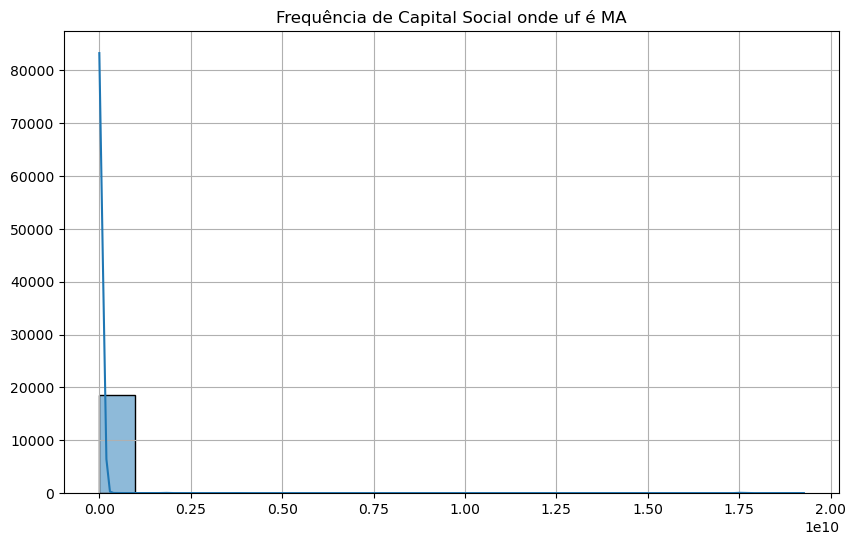

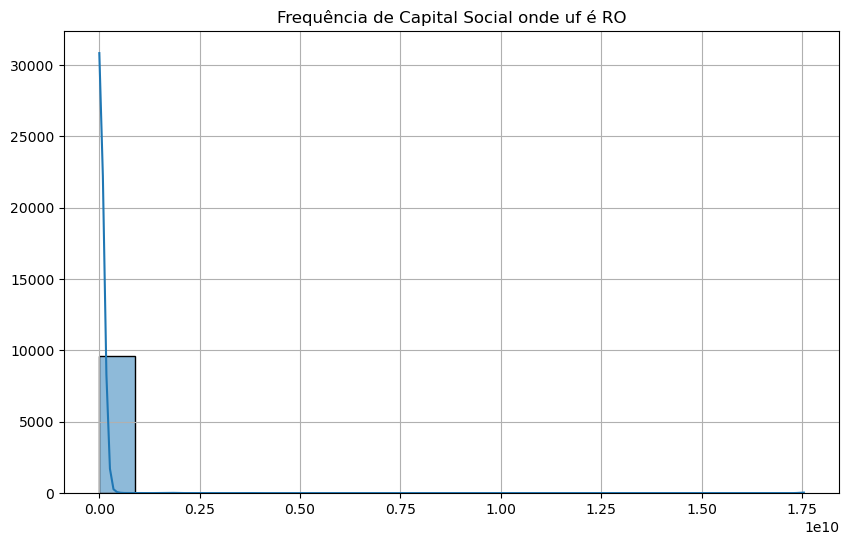

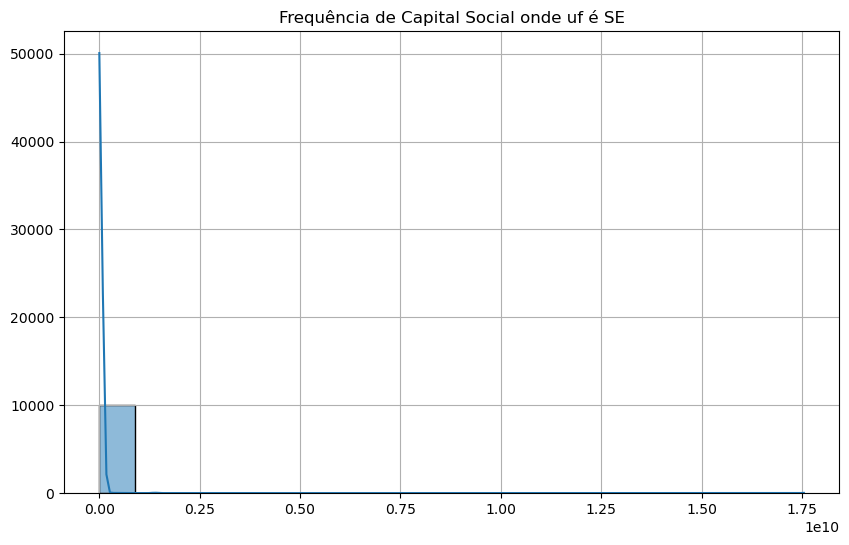

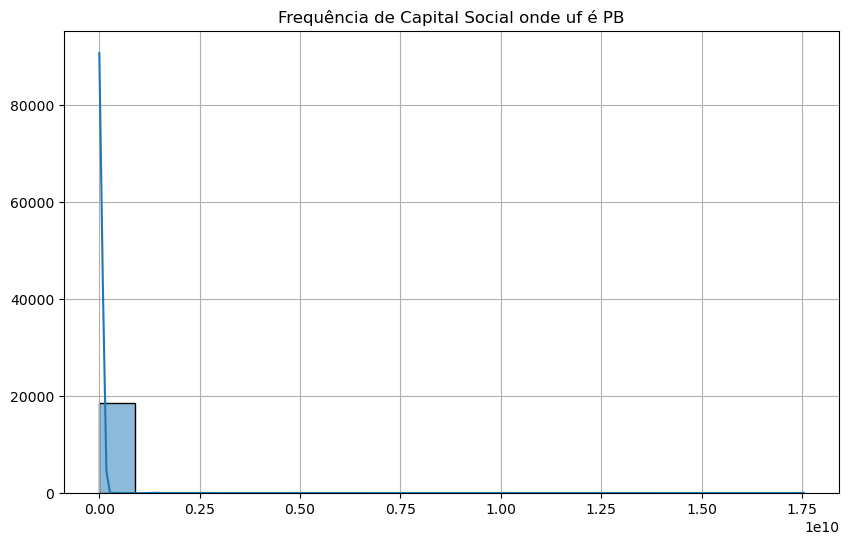

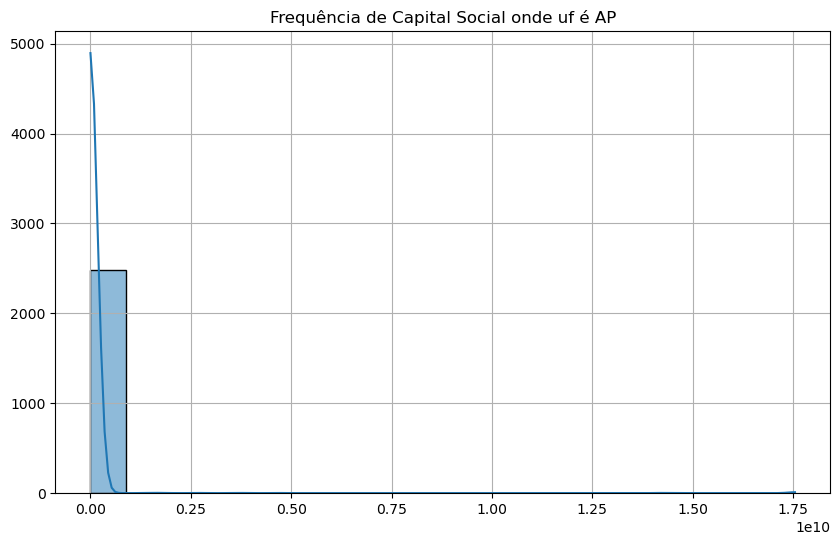

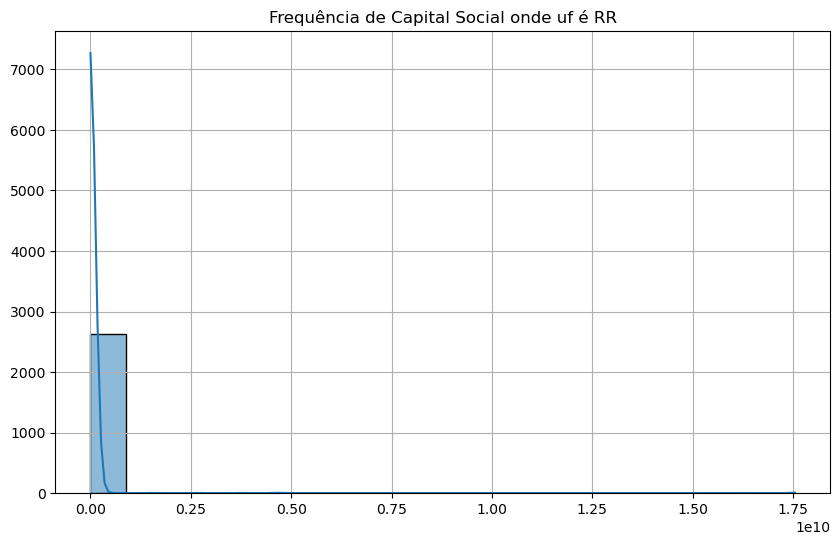

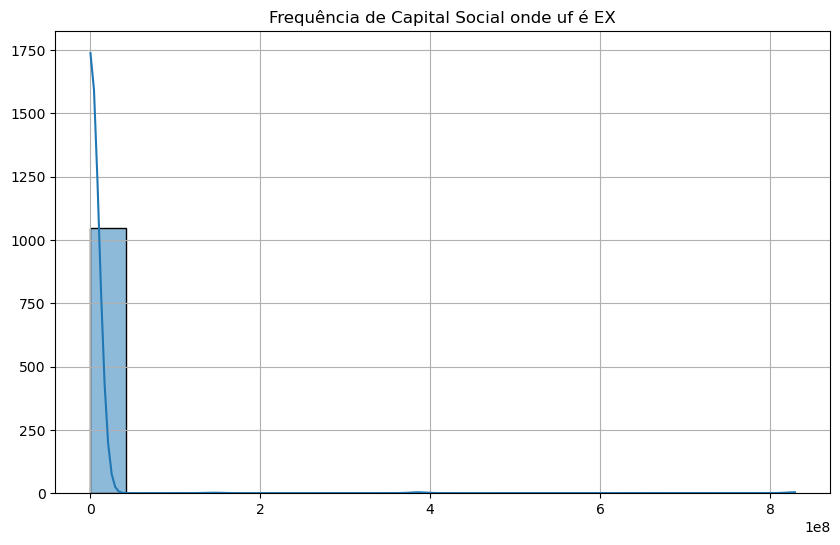

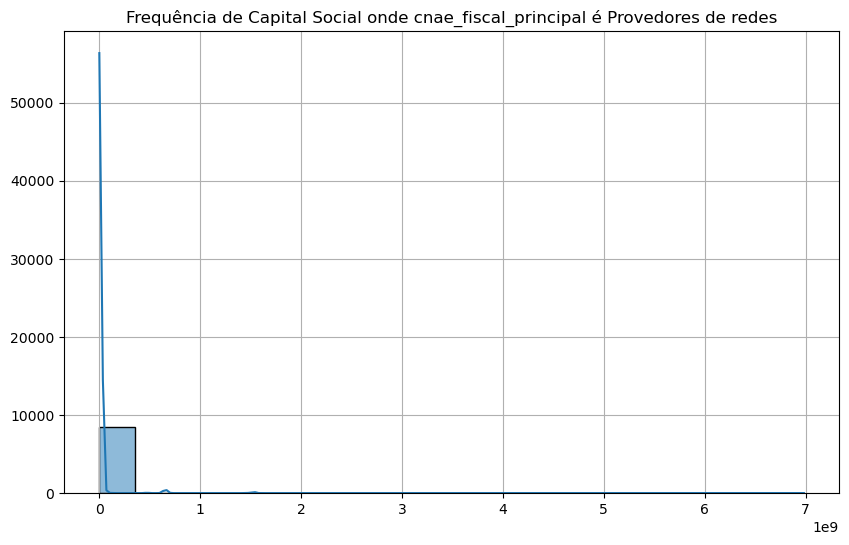

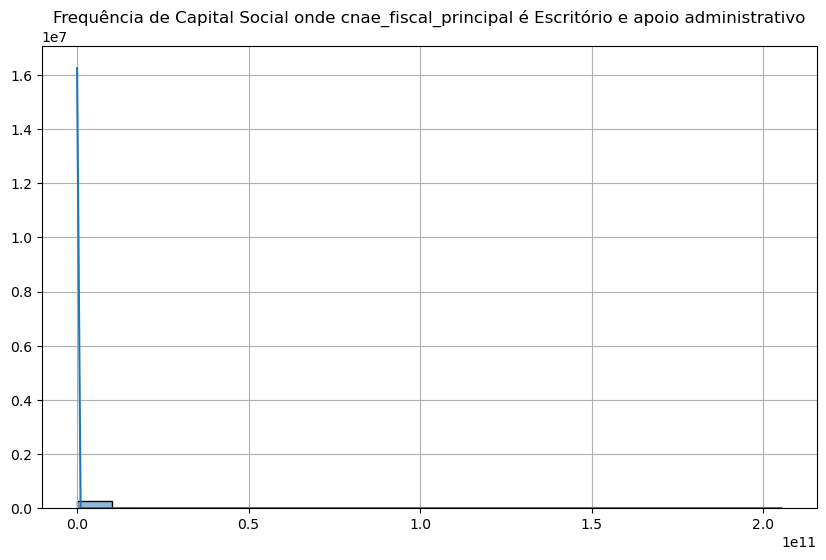

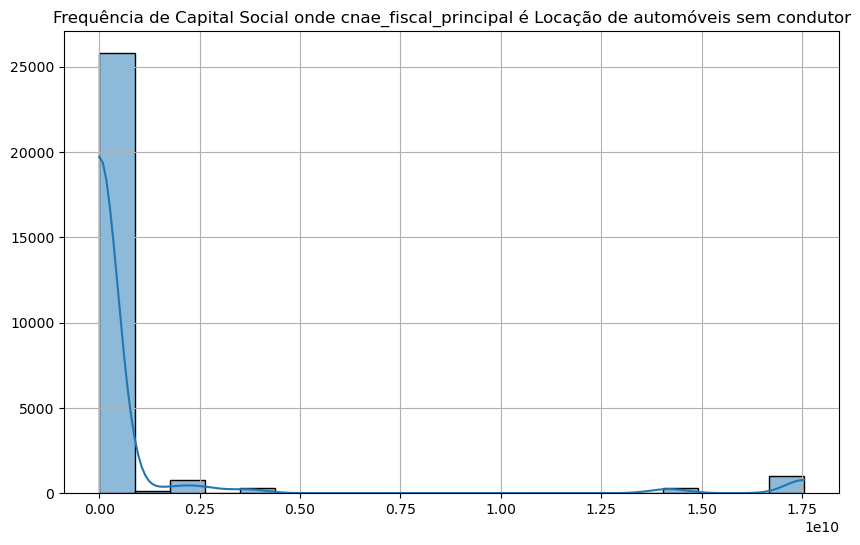

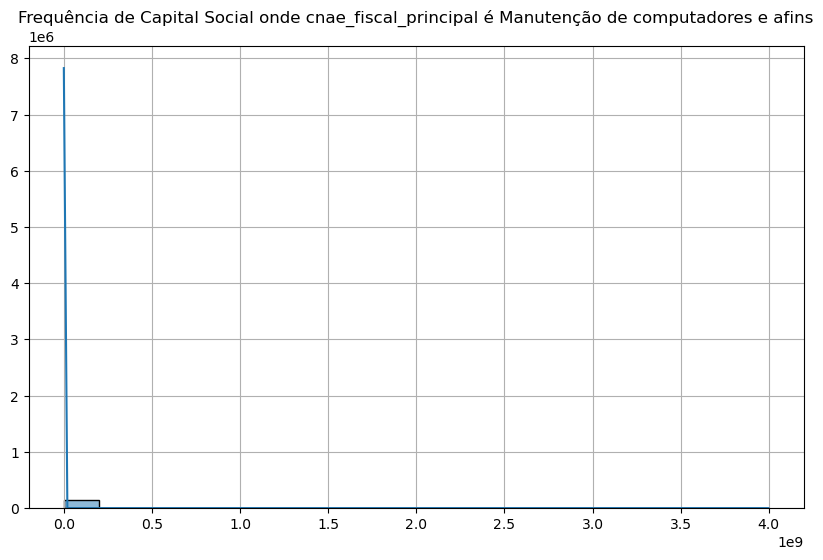

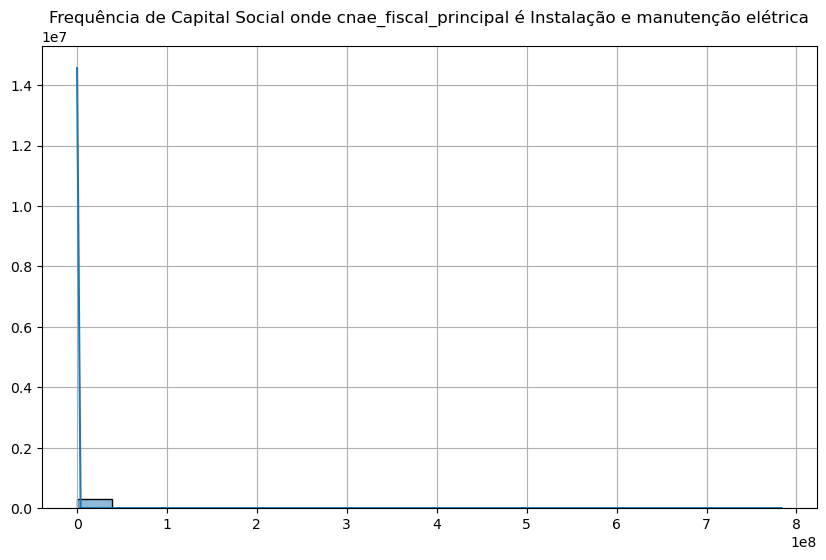

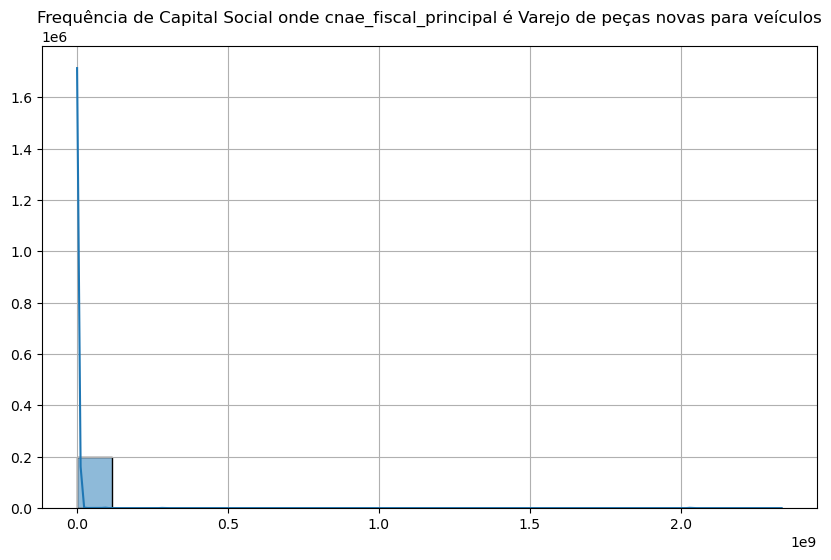

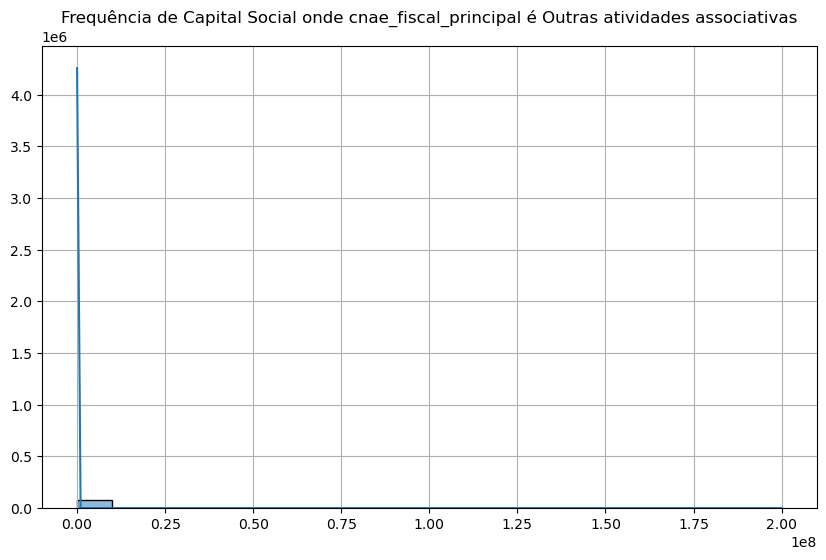

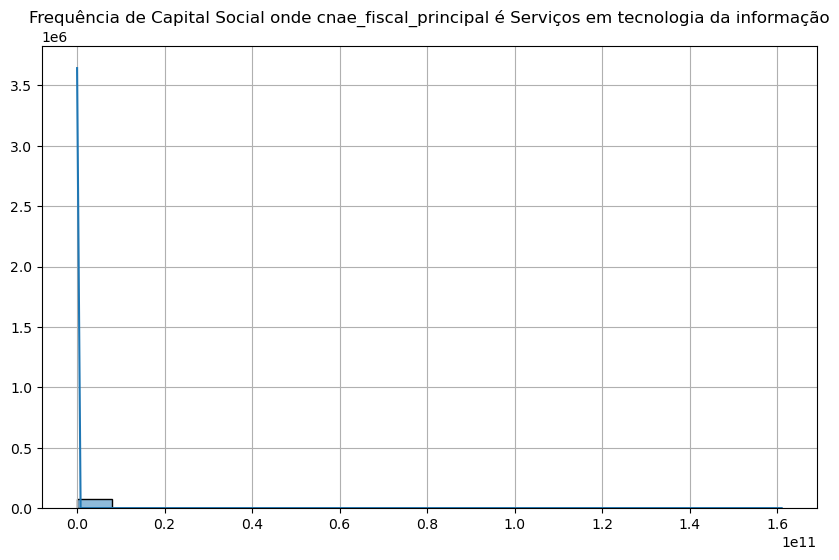

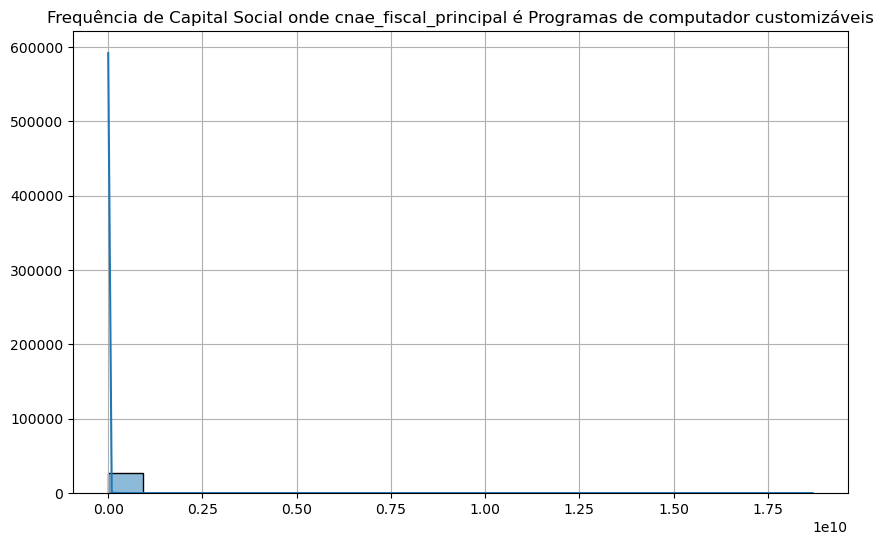

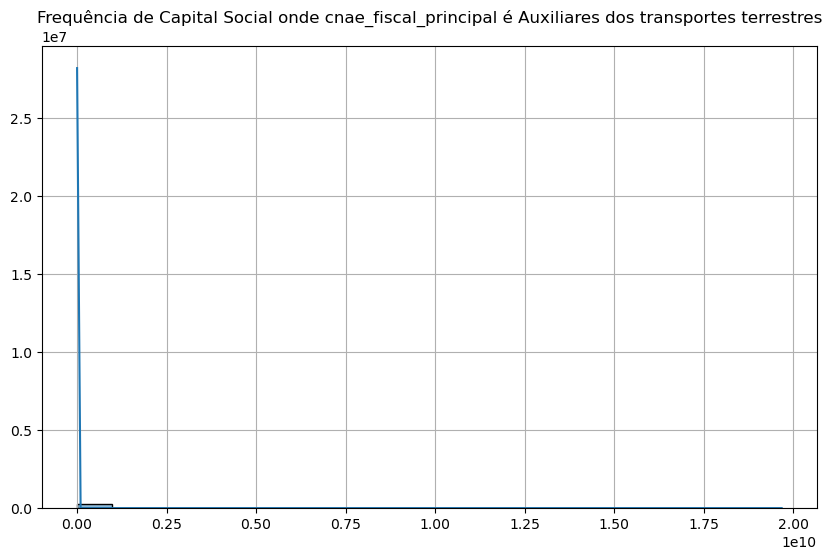

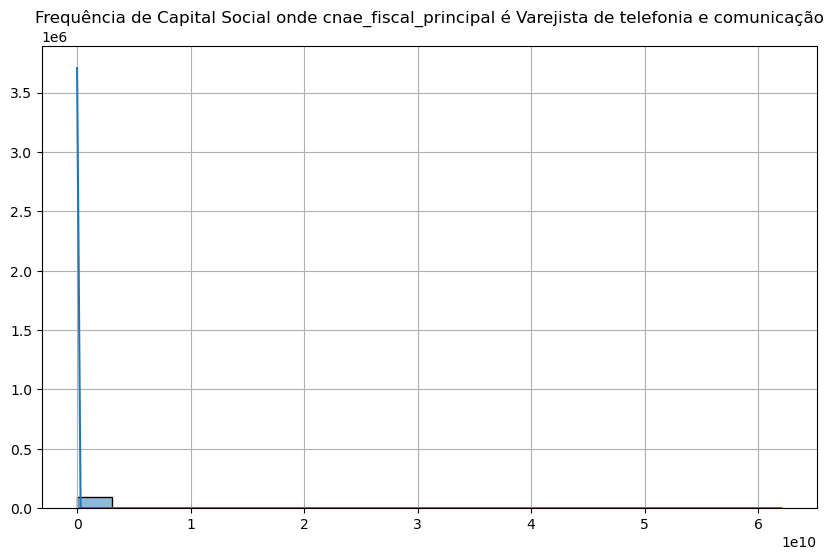

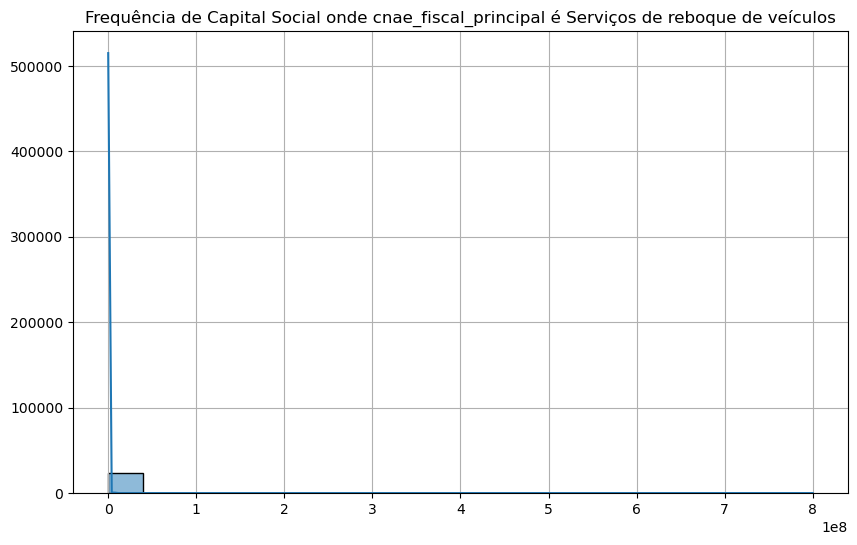

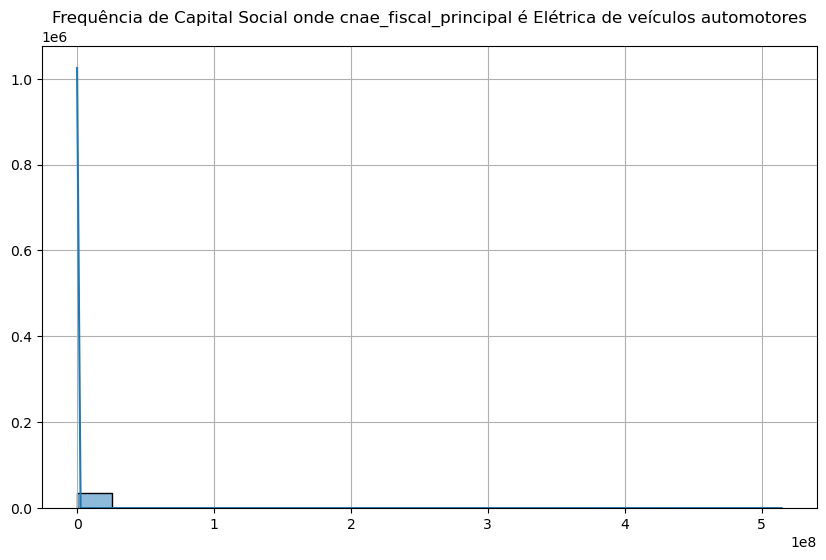

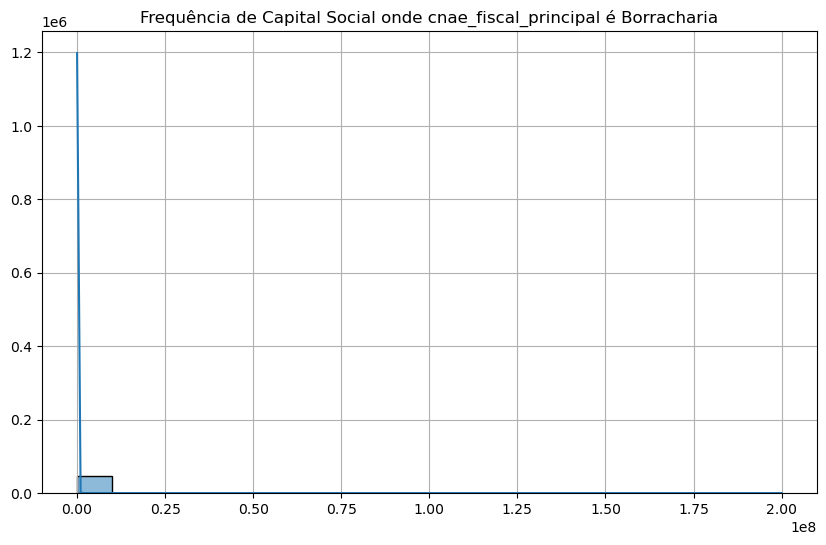

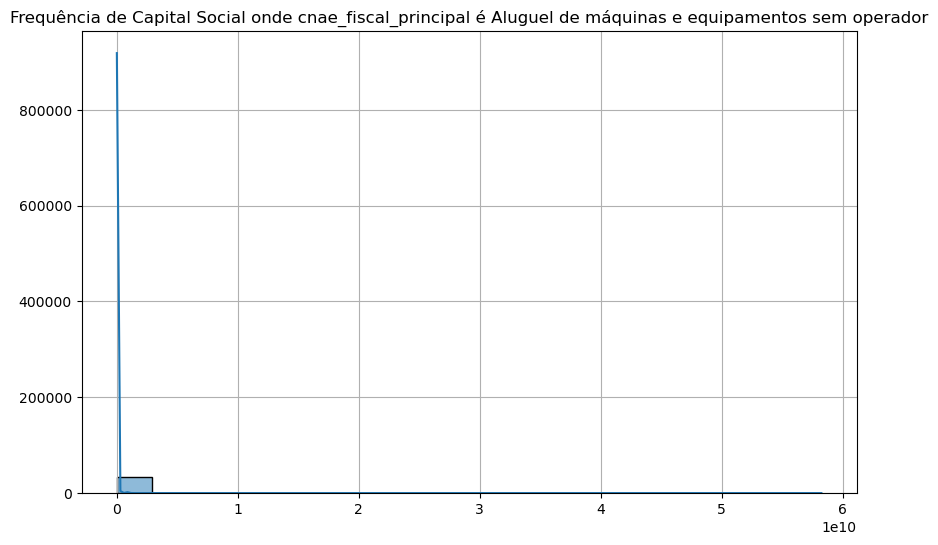

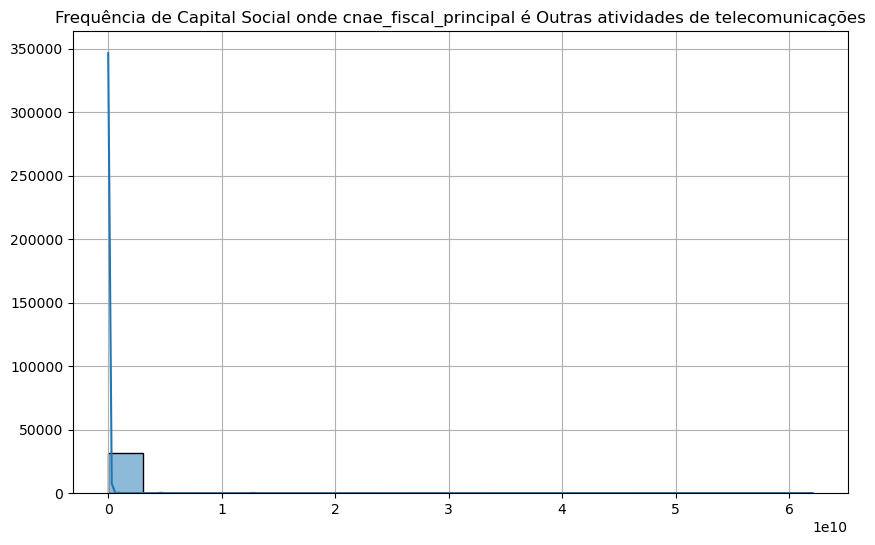

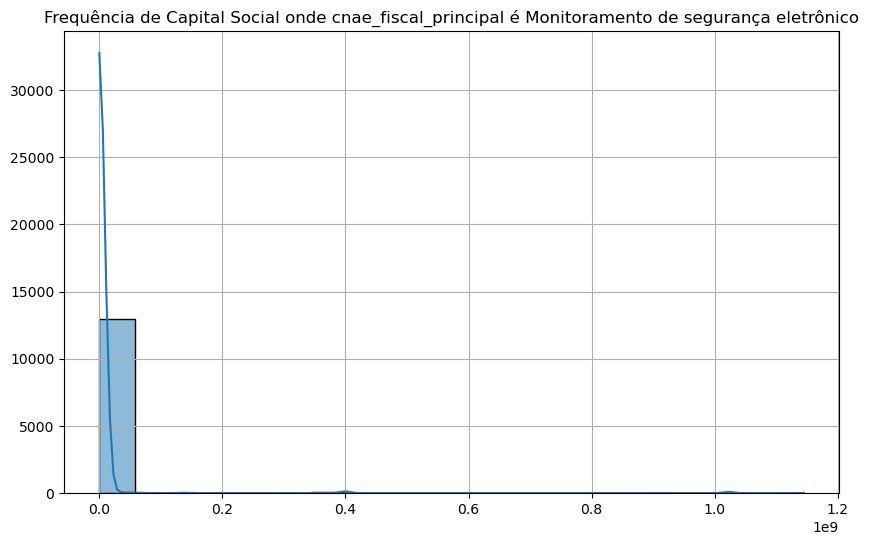

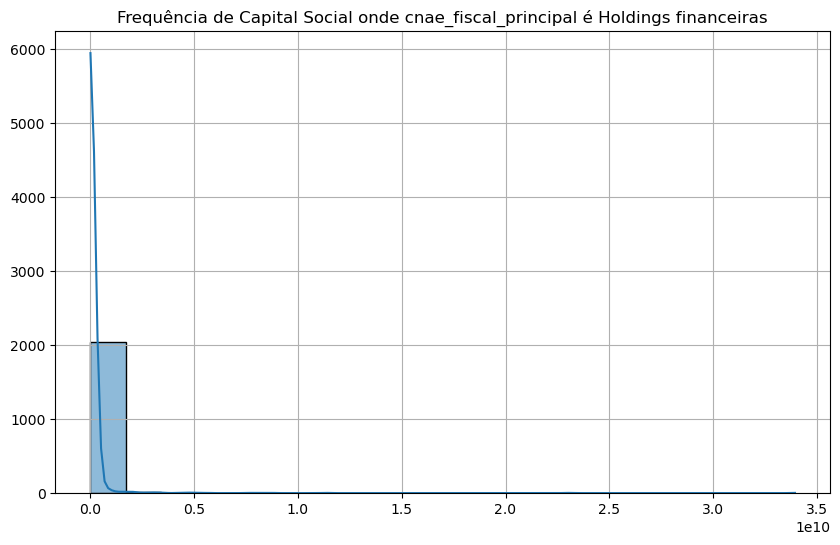

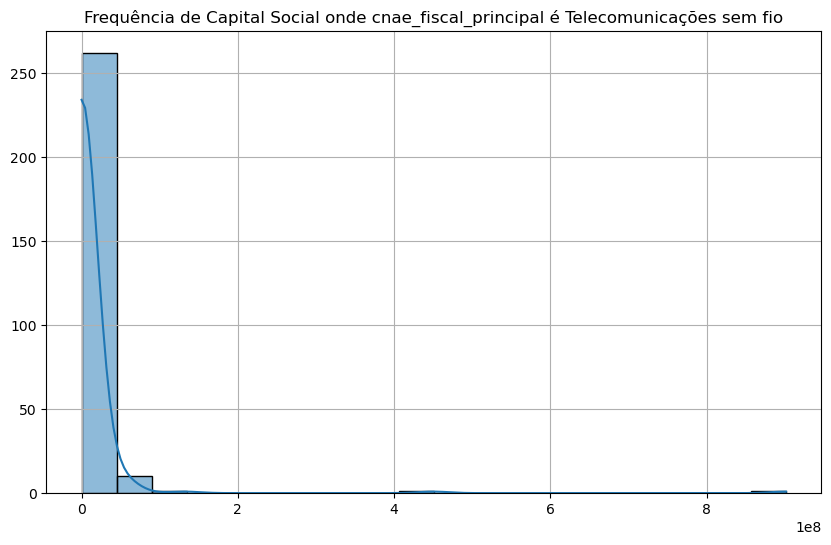

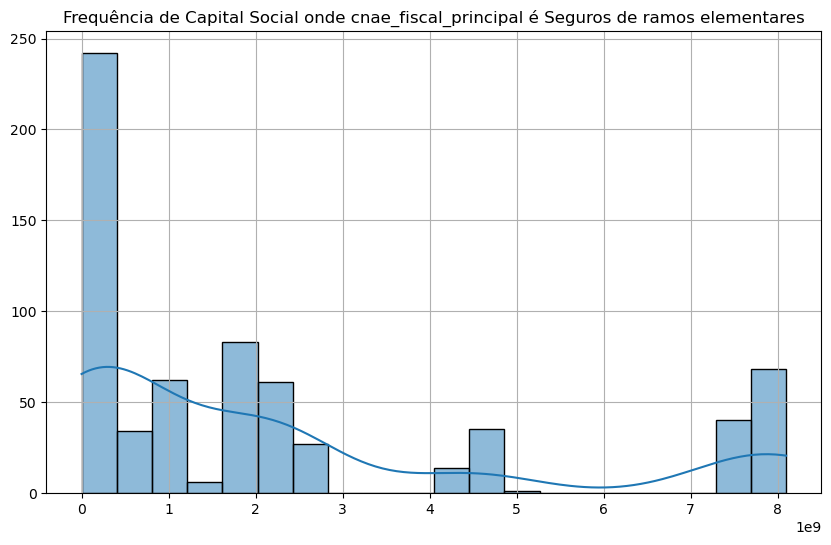

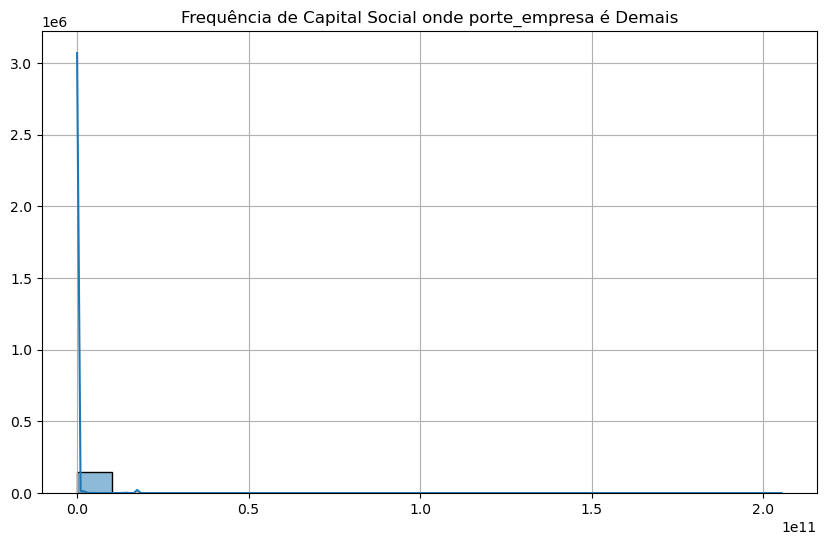

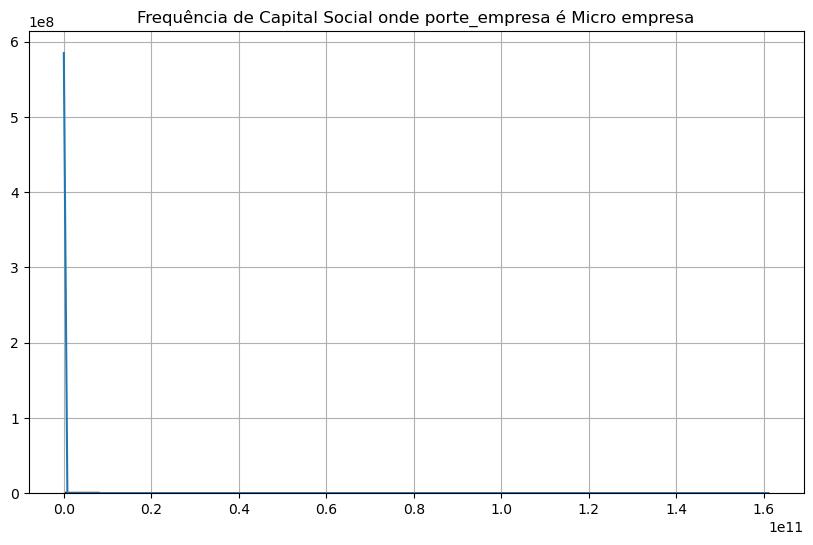

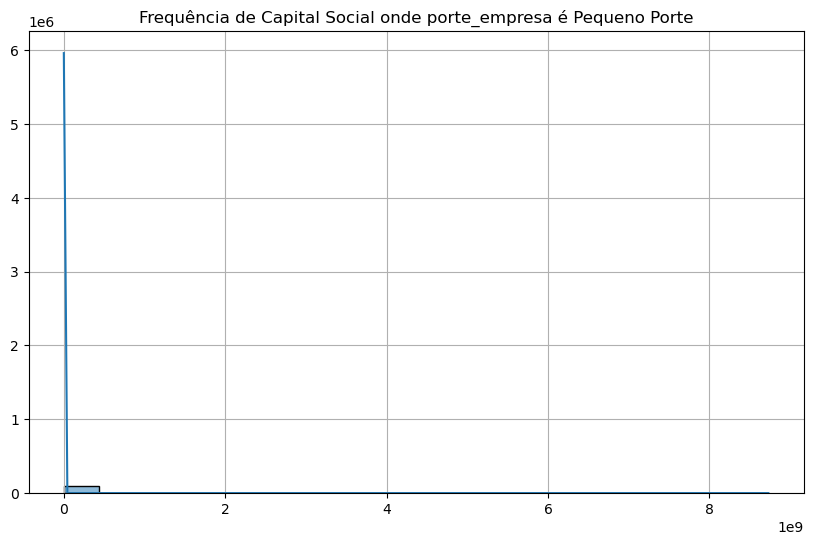

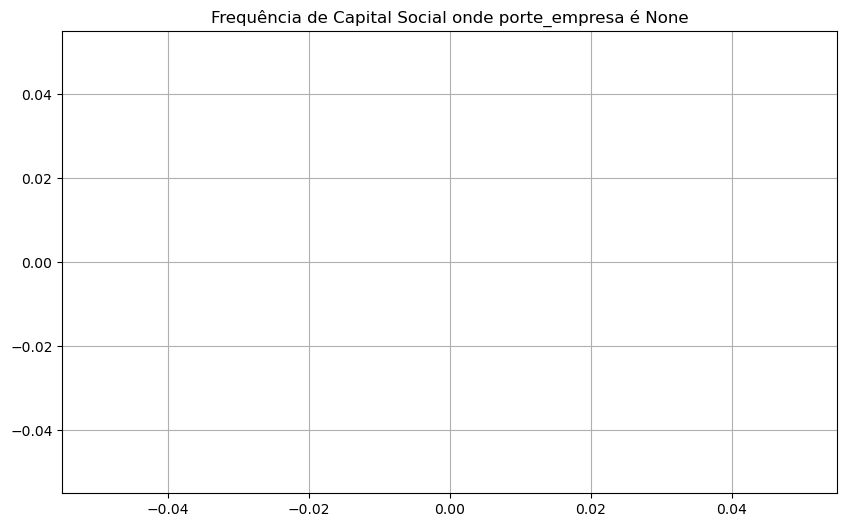

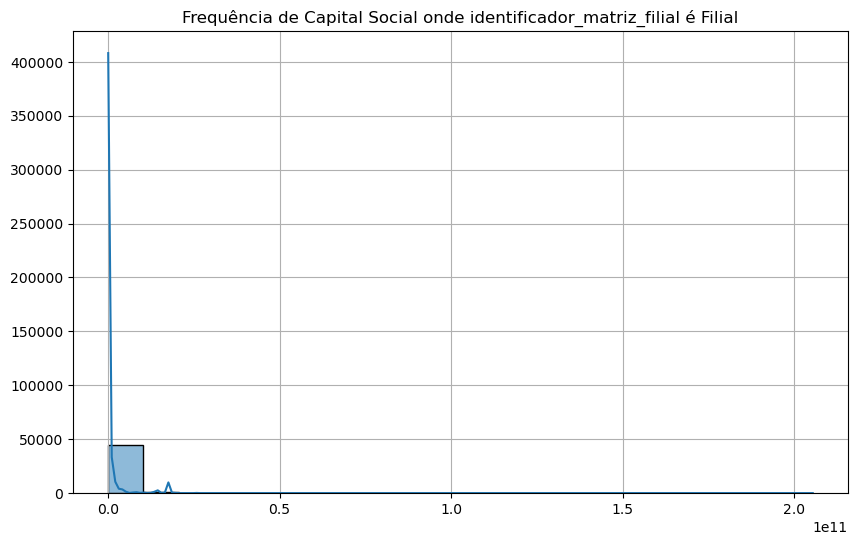

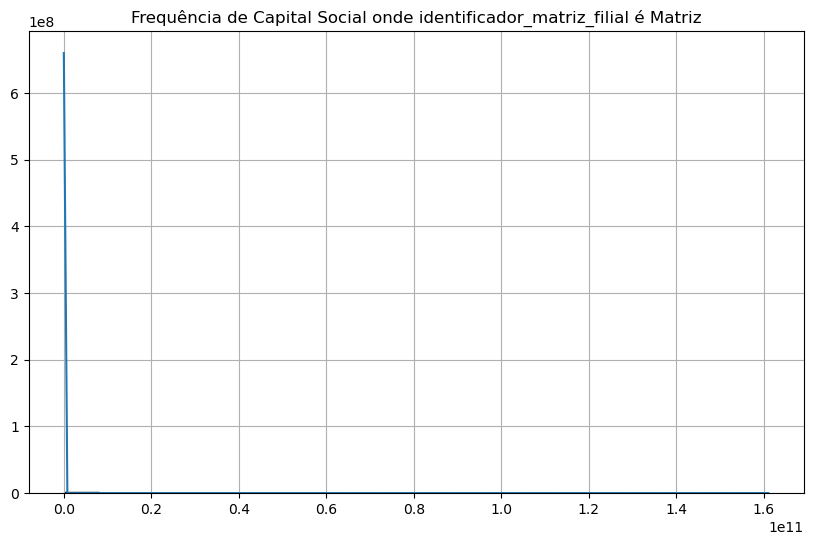

In [184]:
# Na coluna numérica
# Para cada coluna categórica
## Separa as categorias daquela coluna
## Para cada categoria da coluna categórica
### Filtra o df pela categoria na coluna categórica
### Criar um histograma da coluna numérica

for col in c_vars:
    for cat in df[col].unique():
        plot_functions.histograma(df_t[df_t[col] == cat], 'capital_social',f'Frequência de Capital Social onde {col} é {cat}')

Esta série de histogramas demonstra que não há qualquer tendência a aparecer capital social zero de acordo com qualquer característica qualitativa das empresas.

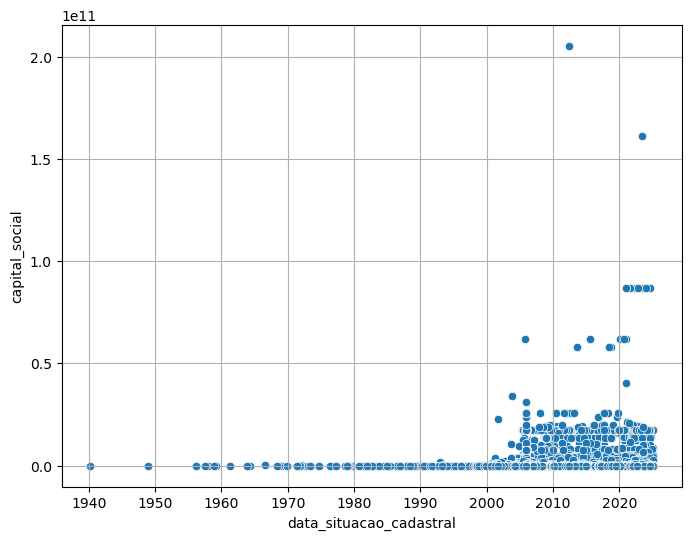

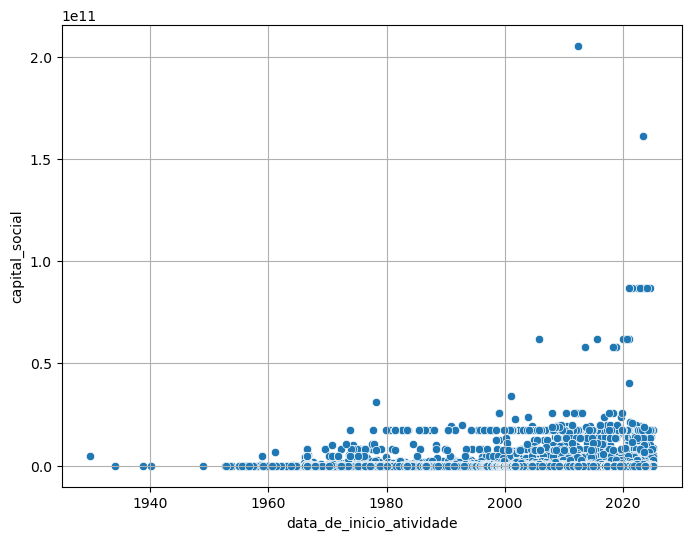

In [185]:
for date in DateTime:
    plot_functions.scatterplots(df_t,date,'capital_social')

Também não há uma tendência visível no tempo.  
Outra característica que levanta suspeita é o número de empresas com capital social idêntico. Cabe uma investigação mais aprofundada da causa desse comportamento, mas isso estaria fora do escopo deste projeto.